<a href="https://colab.research.google.com/github/Antu0/Shear-Wave-Velocity-Prediction/blob/main/Bangora_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 369.2 kB/s eta 0:00:00


In [ ]:
%pip install --quiet shap

In [ ]:
import lasio
import pandas as pd

# Read the first LAS file and create a dataframe
las_bangora_1 = lasio.read("/content/drive/MyDrive/Antu /Thesis/Well Data /Bangora/Bangora-1.LAS")
df_bangora_1 = las_bangora_1.df()

# Read the second LAS file and create a dataframe
las_bangora_4 = lasio.read("/content/drive/MyDrive/Antu /Thesis/Well Data /Bangora/Bangora-4.LAS")
df_bangora_4 = las_bangora_4.df()

print("DataFrame for Bangora-1:")
display(df_bangora_1.head())
print("\nDataFrame for Bangora-4:")
display(df_bangora_4.head())

DataFrame for Bangora-1:


BHC  BIT  CGR  CLD  CLS  CNL  DRH  DTS        EGR  GRD  ...  LLS  MLL  \
DEPTH                                                           ...             
12.000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.285778  NaN  ...  NaN  NaN   
12.076  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  17.696335  NaN  ...  NaN  NaN   
12.152  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.216908  NaN  ...  NaN  NaN   
12.228  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.216908  NaN  ...  NaN  NaN   
12.304  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  19.213486  NaN  ...  NaN  NaN   

        PEF  POT  RT  SP  SPBL  THO  TNS  URA  
DEPTH                                          
12.000  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.076  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.152  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.228  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.304  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  

[5 rows x 24 columns]


DataFrame for Bangora-4:


BHC  CLD  CNL  DRH  DTC  DTS        EGR        GRI  ILD  ILM  LDL  \
DEPTH                                                                       
52.000  NaN  NaN  NaN  NaN  NaN  NaN        NaN        NaN  NaN  NaN  NaN   
52.125  NaN  NaN  NaN  NaN  NaN  NaN        NaN        NaN  NaN  NaN  NaN   
52.250  NaN  NaN  NaN  NaN  NaN  NaN  38.910011  62.158001  NaN  NaN  NaN   
52.375  NaN  NaN  NaN  NaN  NaN  NaN  35.183777  61.042000  NaN  NaN  NaN   
52.500  NaN  NaN  NaN  NaN  NaN  NaN  30.519314  59.645000  NaN  NaN  NaN   

        PEF  RT  SFL  SP  SPBL  TNS  
DEPTH                                
52.000  NaN NaN  NaN NaN   NaN  NaN  
52.125  NaN NaN  NaN NaN   NaN  NaN  
52.250  NaN NaN  NaN NaN   NaN  NaN  
52.375  NaN NaN  NaN NaN   NaN  NaN  
52.500  NaN NaN  NaN NaN   NaN  NaN

In [ ]:
df_bangora_1_copy = df_bangora_1.copy()
df_bangora_4_copy = df_bangora_4.copy()

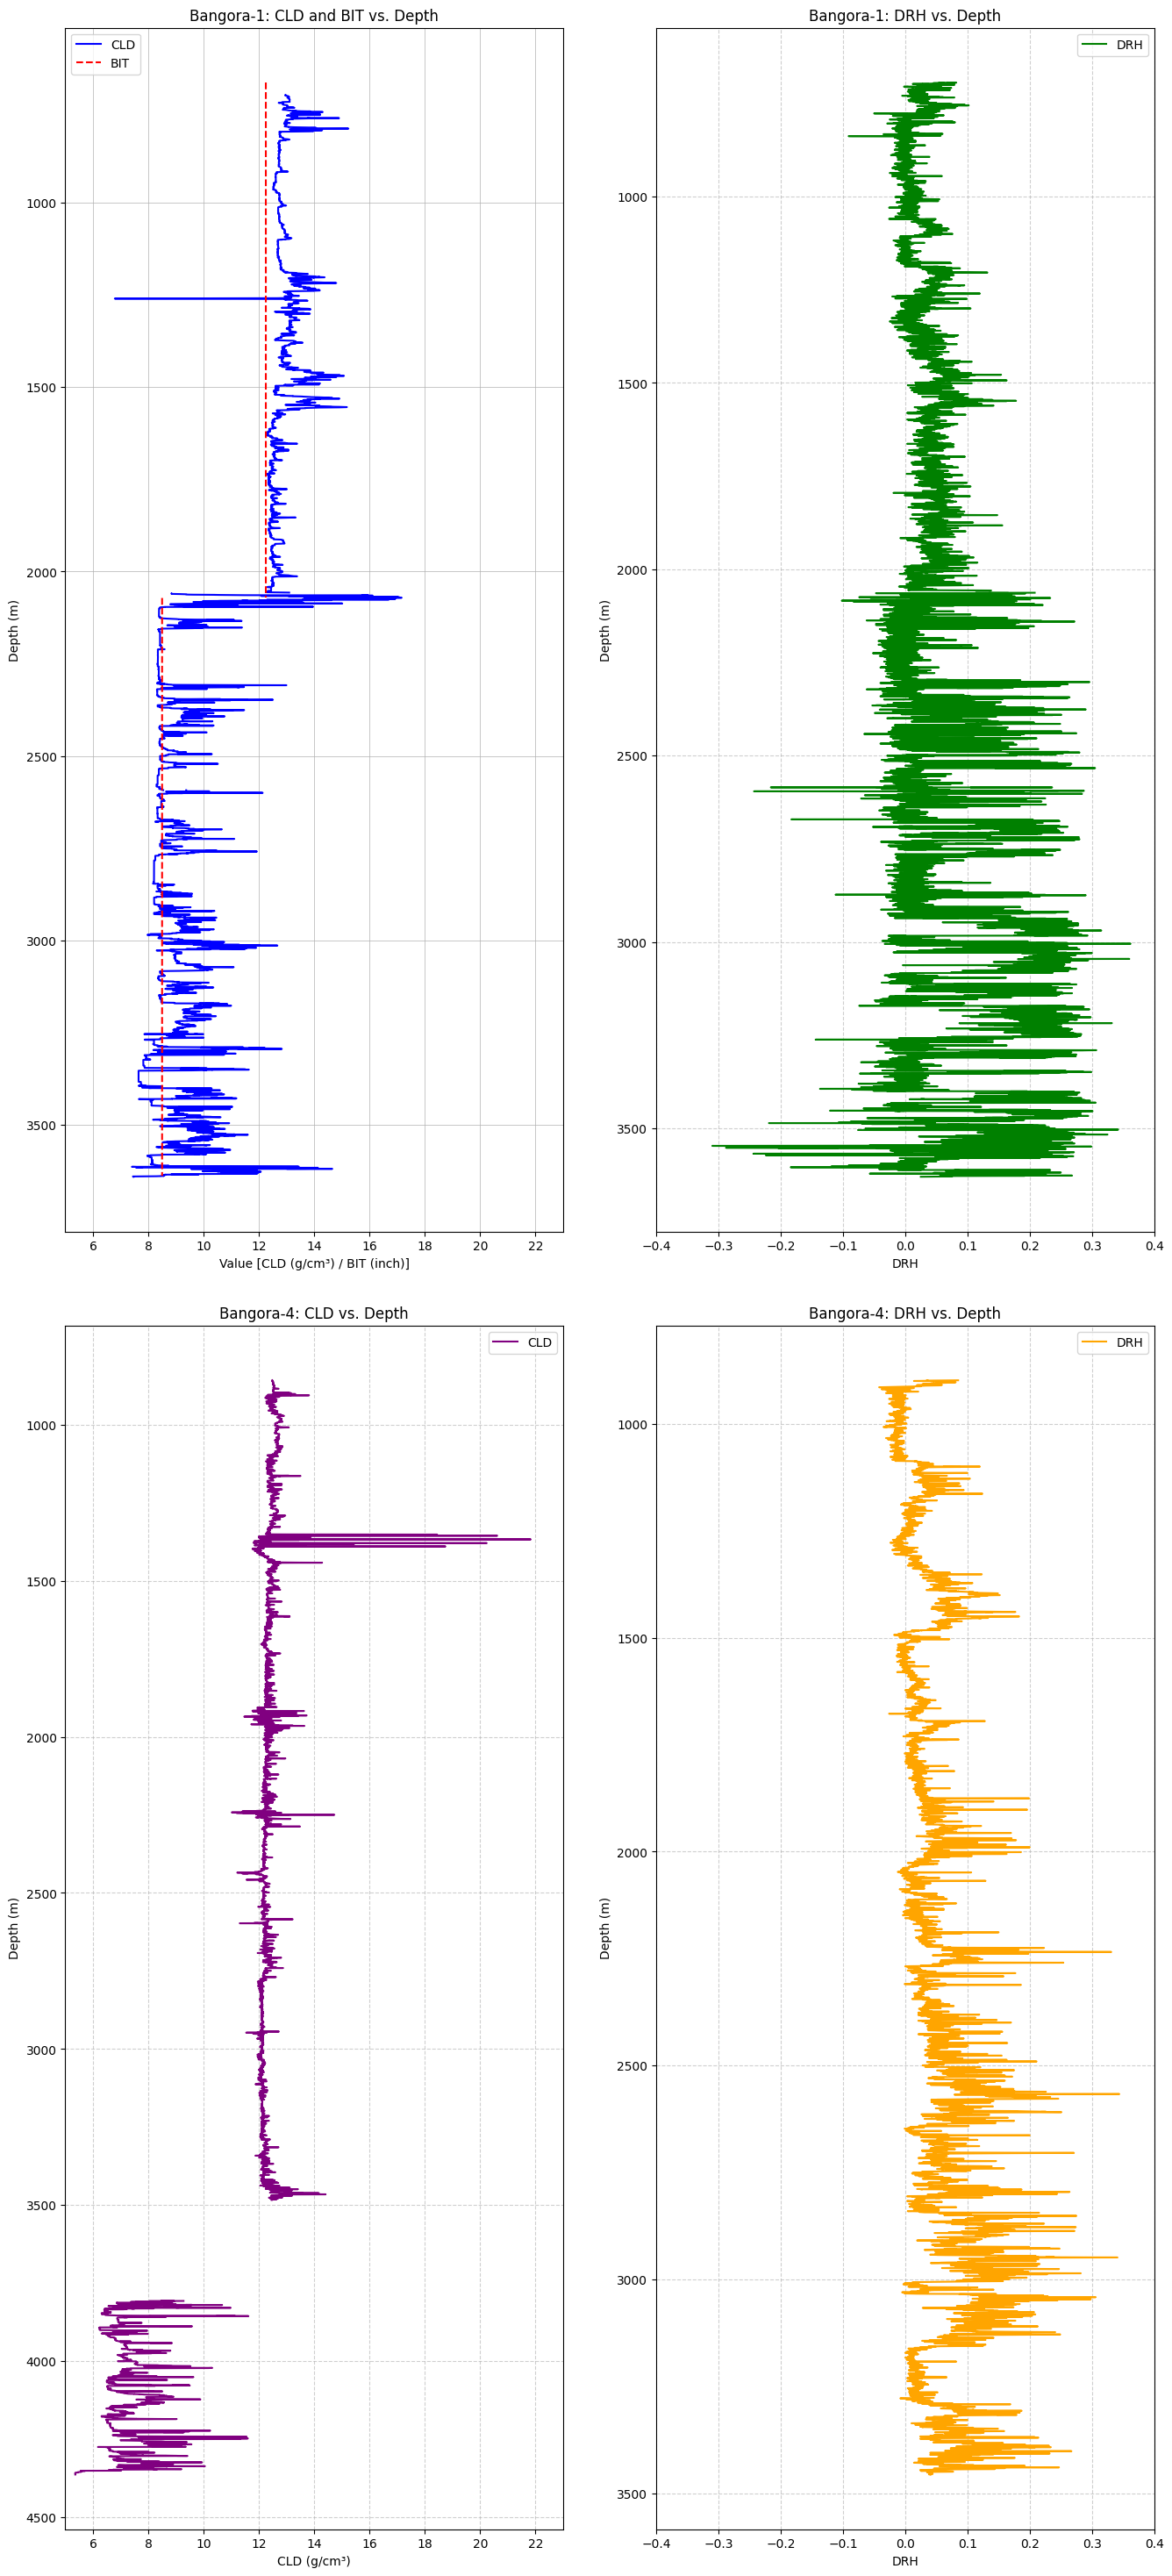

In [ ]:
import matplotlib.pyplot as plt

# --- Create the 4-Plot Figure (2x2 grid) ---
# a figure with 2 rows and 2 columns of subplots.
fig, axes = plt.subplots(2, 2, figsize=(14, 30))


# --- Plot 1: Bangora-1, CLD and BIT (Single Axis) ---
ax1 = axes[0, 0]
ax1.set_title('Bangora-1: CLD and BIT vs. Depth')
ax1.set_ylabel('Depth (m)')
ax1.invert_yaxis() # Invert depth axis so it increases downwards

# Plot CLD on the primary x-axis
ax1.plot(df_bangora_1_copy['CLD'], df_bangora_1_copy.index, color='blue', label='CLD')

# Plot BIT on the same x-axis
ax1.plot(df_bangora_1_copy['BIT'], df_bangora_1_copy.index, color='red', linestyle='--', label='BIT')

# Set a single label for the x-axis that describes both measurements
ax1.set_xlabel('Value [CLD (g/cm³) / BIT (inch)]')
ax1.tick_params(axis='x') # Reset tick parameters
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')

# --- SET X-AXIS LIMIT ---
ax1.set_xlim(5, 23)

# Add a grid for better readability
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)

# Create the legend automatically from the plotted lines
ax1.legend(loc='upper left')



# --- Plot 2: Bangora-1, DRH (Top-Right) ---
ax2 = axes[0, 1]
ax2.plot(df_bangora_1_copy['DRH'], df_bangora_1_copy.index, label='DRH', color='green')
ax2.set_title('Bangora-1: DRH vs. Depth')
ax2.set_xlabel('DRH')
ax2.set_ylabel('Depth (m)')
ax2.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax2.set_xlim(-0.4, 0.4)

ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


# --- Plot 3: Bangora-4, CLD (Bottom-Left) ---
ax3 = axes[1, 0]
ax3.plot(df_bangora_4_copy['CLD'], df_bangora_4_copy.index, label='CLD', color='purple')
ax3.set_title('Bangora-4: CLD vs. Depth')
ax3.set_xlabel('CLD (g/cm³)')
ax3.set_ylabel('Depth (m)')
ax3.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax3.set_xlim(5, 23)

ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Plot 4: Bangora-4, DRH (Bottom-Right) ---
ax4 = axes[1, 1]
ax4.plot(df_bangora_4_copy['DRH'], df_bangora_4_copy.index, label='DRH', color='orange')
ax4.set_title('Bangora-4: DRH vs. Depth')
ax4.set_xlabel('DRH')
ax4.set_ylabel('Depth (m)')
ax4.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax4.set_xlim(-0.4, 0.4)

ax4.legend()
ax4.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# For df_bangora_1_copy
df_bangora_1_copy.loc[
    (abs(df_bangora_1_copy['CLD'] - df_bangora_1_copy['BIT']) > 2) |
    (abs(df_bangora_1_copy['DRH']) > 0.3), :
] = None

# For df_bangora_4_copy
df_bangora_4_copy.loc[
    (df_bangora_4_copy['CLD'] > 14) |
    (abs(df_bangora_4_copy['DRH']) > 0.3) |
    ((df_bangora_4_copy.index >= 3500) & (df_bangora_4_copy.index <= 4500) & (df_bangora_4_copy['CLD'] > 10)), :
] = None

print("Updated DataFrame for Bangora-1:")
display(df_bangora_1_copy.head())
print("\nUpdated DataFrame for Bangora-4:")
display(df_bangora_4_copy.head())

Updated DataFrame for Bangora-1:


BHC  BIT  CGR  CLD  CLS  CNL  DRH  DTS        EGR  GRD  ...  LLS  MLL  \
DEPTH                                                           ...             
12.000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.285778  NaN  ...  NaN  NaN   
12.076  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  17.696335  NaN  ...  NaN  NaN   
12.152  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.216908  NaN  ...  NaN  NaN   
12.228  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  18.216908  NaN  ...  NaN  NaN   
12.304  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  19.213486  NaN  ...  NaN  NaN   

        PEF  POT  RT  SP  SPBL  THO  TNS  URA  
DEPTH                                          
12.000  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.076  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.152  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.228  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  
12.304  NaN  NaN NaN NaN   NaN  NaN  NaN  NaN  

[5 rows x 24 columns]


Updated DataFrame for Bangora-4:


BHC  CLD  CNL  DRH  DTC  DTS        EGR        GRI  ILD  ILM  LDL  \
DEPTH                                                                       
52.000  NaN  NaN  NaN  NaN  NaN  NaN        NaN        NaN  NaN  NaN  NaN   
52.125  NaN  NaN  NaN  NaN  NaN  NaN        NaN        NaN  NaN  NaN  NaN   
52.250  NaN  NaN  NaN  NaN  NaN  NaN  38.910011  62.158001  NaN  NaN  NaN   
52.375  NaN  NaN  NaN  NaN  NaN  NaN  35.183777  61.042000  NaN  NaN  NaN   
52.500  NaN  NaN  NaN  NaN  NaN  NaN  30.519314  59.645000  NaN  NaN  NaN   

        PEF  RT  SFL  SP  SPBL  TNS  
DEPTH                                
52.000  NaN NaN  NaN NaN   NaN  NaN  
52.125  NaN NaN  NaN NaN   NaN  NaN  
52.250  NaN NaN  NaN NaN   NaN  NaN  
52.375  NaN NaN  NaN NaN   NaN  NaN  
52.500  NaN NaN  NaN NaN   NaN  NaN

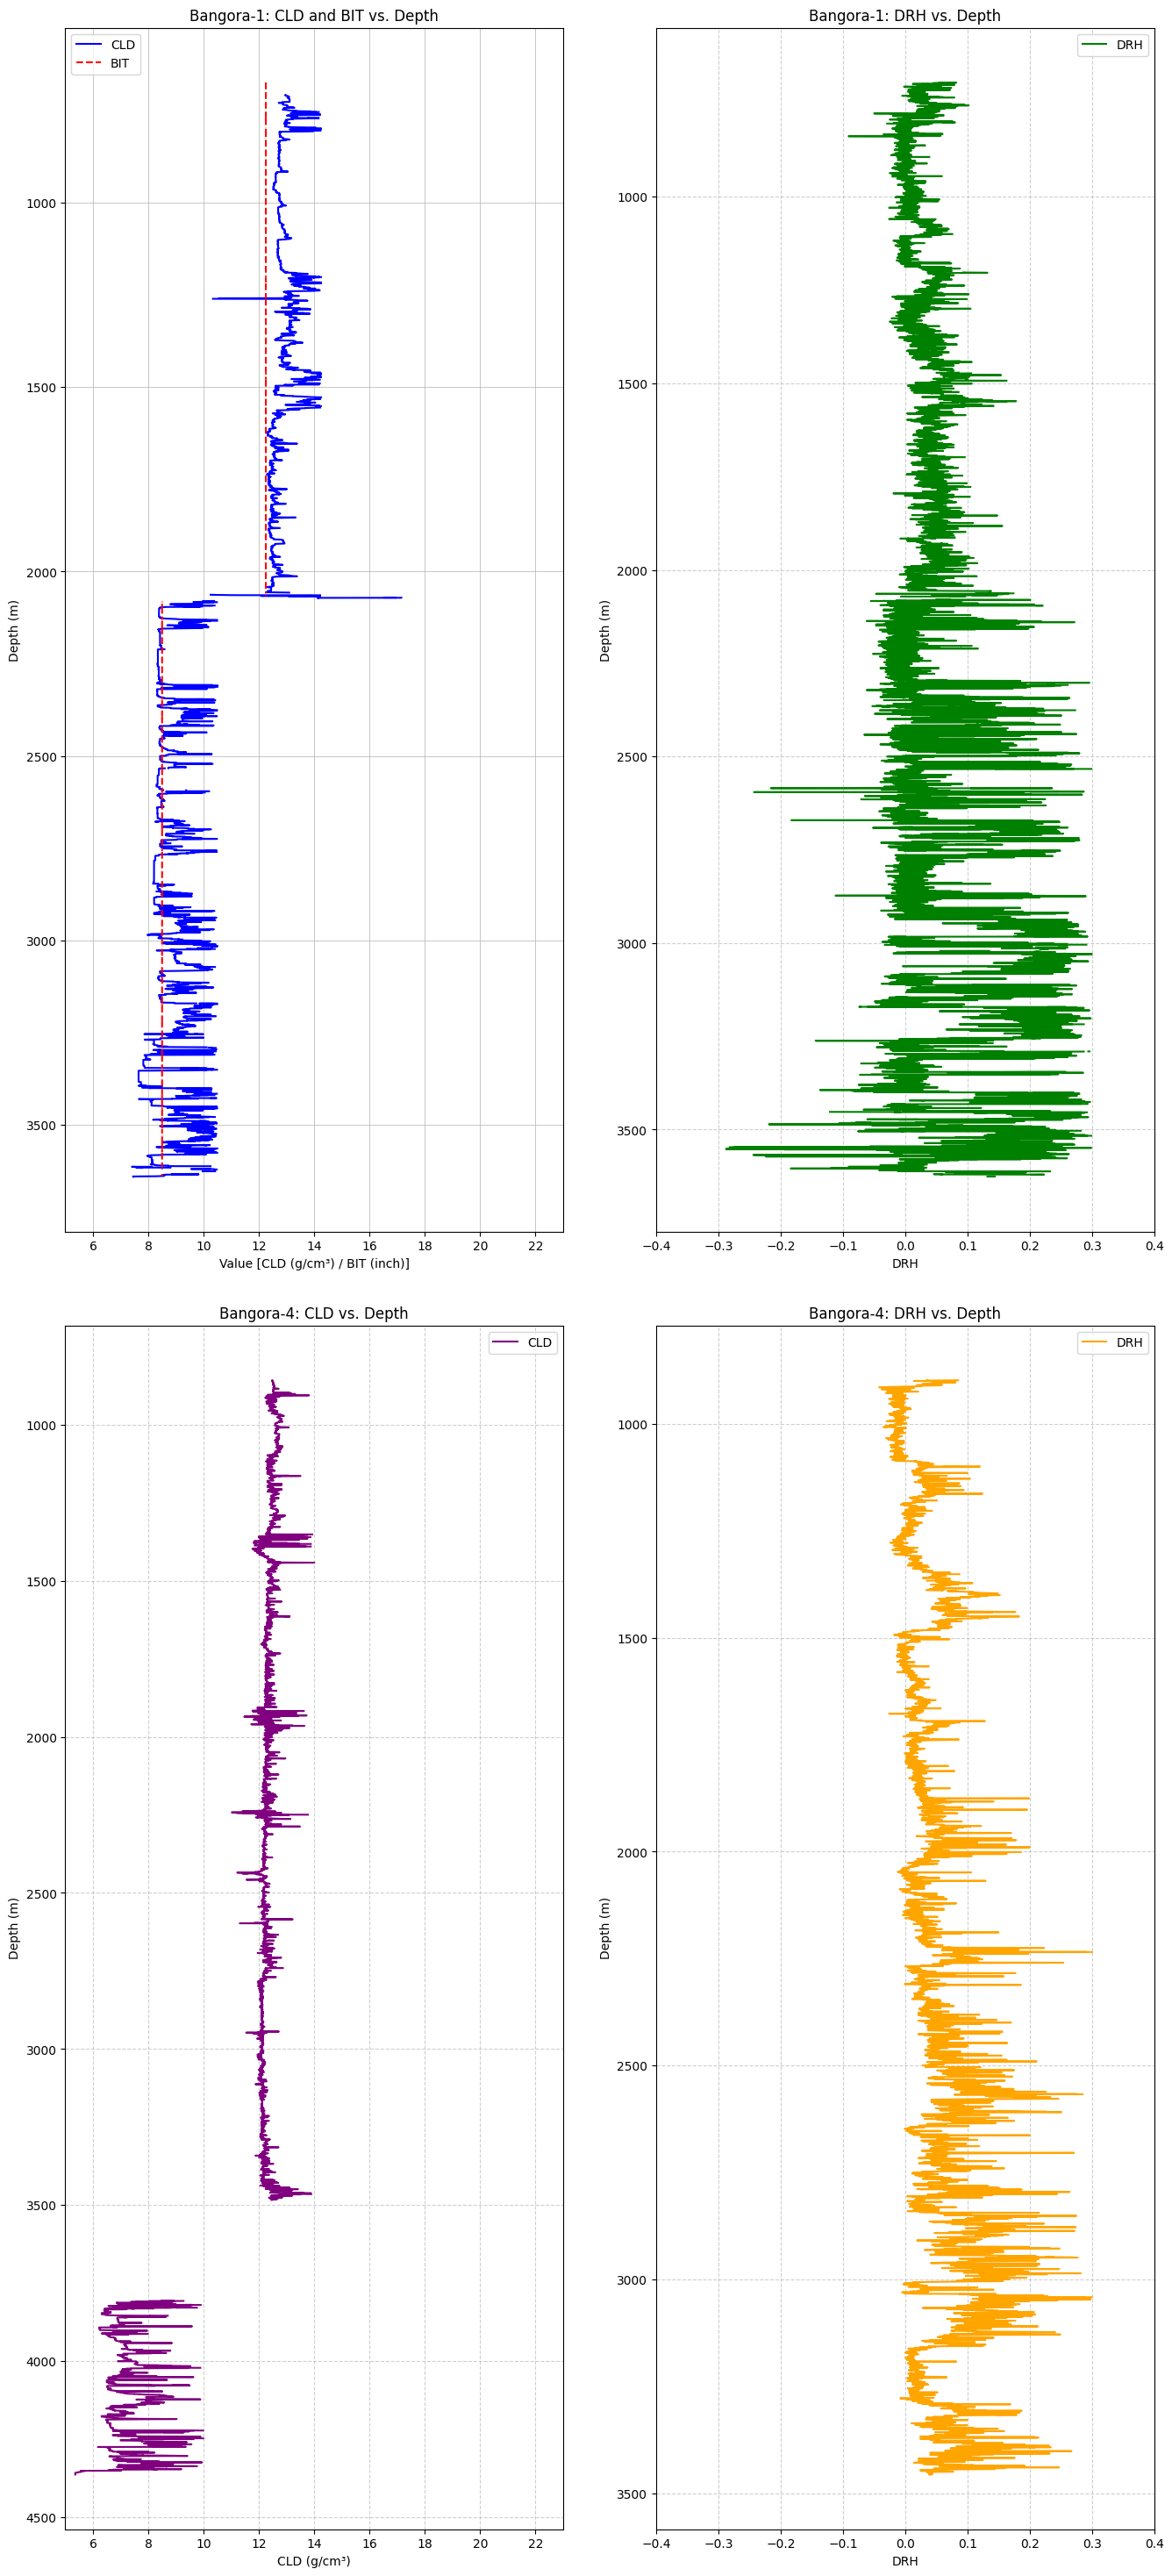

In [ ]:
import matplotlib.pyplot as plt
# Assuming df_bangora_1_copy and df_bangora_4_copy are already defined

# --- Create the 4-Plot Figure (2x2 grid) ---
# a figure with 2 rows and 2 columns of subplots.
fig, axes = plt.subplots(2, 2, figsize=(14, 30))


# --- Plot 1: Bangora-1, CLD and BIT (Single Axis) ---
ax1 = axes[0, 0]
ax1.set_title('Bangora-1: CLD and BIT vs. Depth')
ax1.set_ylabel('Depth (m)')
ax1.invert_yaxis() # Invert depth axis so it increases downwards

# Plot CLD on the primary x-axis
ax1.plot(df_bangora_1_copy['CLD'], df_bangora_1_copy.index, color='blue', label='CLD')

# Plot BIT on the same x-axis
ax1.plot(df_bangora_1_copy['BIT'], df_bangora_1_copy.index, color='red', linestyle='--', label='BIT')

# Set a single label for the x-axis that describes both measurements
ax1.set_xlabel('Value [CLD (g/cm³) / BIT (inch)]')
ax1.tick_params(axis='x') # Reset tick parameters
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')

# --- SET X-AXIS LIMIT ---
ax1.set_xlim(5, 23)

# Add a grid for better readability
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)

# Create the legend automatically from the plotted lines
ax1.legend(loc='upper left')



# --- Plot 2: Bangora-1, DRH (Top-Right) ---
ax2 = axes[0, 1]
ax2.plot(df_bangora_1_copy['DRH'], df_bangora_1_copy.index, label='DRH', color='green')
ax2.set_title('Bangora-1: DRH vs. Depth')
ax2.set_xlabel('DRH')
ax2.set_ylabel('Depth (m)')
ax2.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax2.set_xlim(-0.4, 0.4)

ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


# --- Plot 3: Bangora-4, CLD (Bottom-Left) ---
ax3 = axes[1, 0]
ax3.plot(df_bangora_4_copy['CLD'], df_bangora_4_copy.index, label='CLD', color='purple')
ax3.set_title('Bangora-4: CLD vs. Depth')
ax3.set_xlabel('CLD (g/cm³)')
ax3.set_ylabel('Depth (m)')
ax3.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax3.set_xlim(5, 23)

ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Plot 4: Bangora-4, DRH (Bottom-Right) ---
ax4 = axes[1, 1]
ax4.plot(df_bangora_4_copy['DRH'], df_bangora_4_copy.index, label='DRH', color='orange')
ax4.set_title('Bangora-4: DRH vs. Depth')
ax4.set_xlabel('DRH')
ax4.set_ylabel('Depth (m)')
ax4.invert_yaxis()

# --- SET X-AXIS LIMIT ---
ax4.set_xlim(-0.4, 0.4)

ax4.legend()
ax4.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Define the columns to select
selected_columns = ['EGR', 'LDL', 'CNL', 'PEF', 'RT', 'BHC', 'DTS']

# Select the specified columns from df_bangora_1_copy
df_bangora_1_copy = df_bangora_1_copy[selected_columns]

# Select the specified columns from df_bangora_4_copy
df_bangora_4_copy = df_bangora_4_copy[selected_columns]

print("Updated DataFrame for Bangora-1 (with selected columns):")
display(df_bangora_1_copy.head())
print("\nUpdated DataFrame for Bangora-4 (with selected columns):")
display(df_bangora_4_copy.head())

Updated DataFrame for Bangora-1 (with selected columns):


EGR  LDL  CNL  PEF  RT  BHC  DTS
DEPTH                                         
12.000  18.285778  NaN  NaN  NaN NaN  NaN  NaN
12.076  17.696335  NaN  NaN  NaN NaN  NaN  NaN
12.152  18.216908  NaN  NaN  NaN NaN  NaN  NaN
12.228  18.216908  NaN  NaN  NaN NaN  NaN  NaN
12.304  19.213486  NaN  NaN  NaN NaN  NaN  NaN


Updated DataFrame for Bangora-4 (with selected columns):


EGR  LDL  CNL  PEF  RT  BHC  DTS
DEPTH                                         
52.000        NaN  NaN  NaN  NaN NaN  NaN  NaN
52.125        NaN  NaN  NaN  NaN NaN  NaN  NaN
52.250  38.910011  NaN  NaN  NaN NaN  NaN  NaN
52.375  35.183777  NaN  NaN  NaN NaN  NaN  NaN
52.500  30.519314  NaN  NaN  NaN NaN  NaN  NaN

In [ ]:
# Remove rows with NaN values from df_bangora_1_copy
df_bangora_1_copy = df_bangora_1_copy.dropna()

# Remove rows with NaN values from df_bangora_4_copy
df_bangora_4_copy = df_bangora_4_copy.dropna()

print("Updated DataFrame for Bangora-1 (rows with NaN removed):")
display(df_bangora_1_copy.head())
print("\nUpdated DataFrame for Bangora-4 (rows with NaN removed):")
display(df_bangora_4_copy.head())

print("\nNumber of rows in df_bangora_1_copy after removing NaNs:", len(df_bangora_1_copy))
print("Number of rows in df_bangora_4_copy after removing NaNs:", len(df_bangora_4_copy))

Updated DataFrame for Bangora-1 (rows with NaN removed):


EGR    LDL      CNL    PEF        RT        BHC        DTS
DEPTH                                                                      
2088.3959  108.55186  2.465  0.27896  7.435  5.588121  92.084000  173.97000
2088.4719  111.38565  2.415  0.27563  7.059  5.671242  92.077003  173.12399
2088.5479  111.38565  2.404  0.27436  6.517  5.754212  92.077003  173.12399
2088.6239  113.42975  2.437  0.27443  6.167  5.899687  91.822998  172.61501
2088.6999  115.18416  2.460  0.27501  5.961  5.899687  91.527000  171.91701


Updated DataFrame for Bangora-4 (rows with NaN removed):


EGR    LDL      CNL    PEF         RT      BHC        DTS
DEPTH                                                                   
948.375  69.301872  2.147  0.33379  2.560  13.741076  123.327  270.00000
948.500  67.748451  2.149  0.33178  2.569  13.724893  121.796  265.29999
948.625  67.449219  2.156  0.33071  2.567  12.132120  120.234  262.29999
948.750  69.252167  2.165  0.33011  2.564   9.890315  119.025  261.20001
948.875  72.664703  2.172  0.32958  2.559   7.868135  118.064  260.00000


Number of rows in df_bangora_1_copy after removing NaNs: 19359
Number of rows in df_bangora_4_copy after removing NaNs: 18547


In [ ]:
print("Description of df_bangora_1_copy:")
df_bangora_1_copy.info()
display(df_bangora_1_copy.describe())

print("\nDescription of df_bangora_4_copy:")
df_bangora_4_copy.info()
display(df_bangora_4_copy.describe())

Description of df_bangora_1_copy:
<class 'pandas.core.frame.DataFrame'>
Index: 19359 entries, 2088.3959 to 3614.0199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EGR     19359 non-null  float64
 1   LDL     19359 non-null  float64
 2   CNL     19359 non-null  float64
 3   PEF     19359 non-null  float64
 4   RT      19359 non-null  float64
 5   BHC     19359 non-null  float64
 6   DTS     19359 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


EGR           LDL           CNL           PEF            RT  \
count  19359.000000  19359.000000  19359.000000  19359.000000  19359.000000   
mean      91.686362      2.394213      0.222804      9.054810      8.707610   
std       23.744330      0.172481      0.044038      3.608437      5.433605   
min       29.785240      1.587000      0.087350      2.045000      1.602167   
25%       73.845482      2.296000      0.188610      5.943000      5.053076   
50%       97.391327      2.430000      0.224970      7.565000      7.491038   
75%      110.297180      2.523000      0.255715     12.549000     10.996524   
max      152.306320      3.055000      0.410080     19.243000     35.404171   

                BHC           DTS  
count  19359.000000  19359.000000  
mean      79.490224    143.308552  
std        8.351353     17.022693  
min       62.787998    105.834000  
25%       73.049004    130.007995  
50%       77.848999    142.056000  
75%       85.598000    155.215000  
max      115.070000    187.073000


Description of df_bangora_4_copy:
<class 'pandas.core.frame.DataFrame'>
Index: 18547 entries, 948.375 to 3451.875
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EGR     18547 non-null  float64
 1   LDL     18547 non-null  float64
 2   CNL     18547 non-null  float64
 3   PEF     18547 non-null  float64
 4   RT      18547 non-null  float64
 5   BHC     18547 non-null  float64
 6   DTS     18547 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


EGR           LDL           CNL           PEF            RT  \
count  18547.000000  18547.000000  18547.000000  18547.000000  18547.000000   
mean      99.973590      2.428762      0.272638      3.089807      6.225566   
std       20.488101      0.133203      0.050440      0.308374      2.559416   
min       10.914787      2.089000      0.045890      2.274000      1.421788   
25%       88.886024      2.334000      0.234570      2.874000      4.398878   
50%      104.799290      2.472000      0.265680      3.137000      5.964335   
75%      115.482750      2.537000      0.313665      3.298000      7.925354   
max      151.949770      2.719000      0.432520      6.445000     25.473814   

                BHC           DTS  
count  18547.000000  18547.000000  
mean      89.222504    180.431445  
std       14.881717     41.773700  
min       47.243000    110.000000  
25%       76.960999    147.700000  
50%       85.182999    161.350010  
75%      102.055500    217.575005  
max      154.702000    316.899990

In [ ]:
# Calculate and add new columns to df_bangora_1_copy

# VP = (1/BHC)×304,800
df_bangora_1_copy['VP'] = (1 / df_bangora_1_copy['BHC']) * 304800

# VS = (1/DTS)×304,800
df_bangora_1_copy['VS'] = (1 / df_bangora_1_copy['DTS']) * 304800

# RHOB = LDL × 1000
df_bangora_1_copy['RHOB'] = df_bangora_1_copy['LDL'] * 1000

# RT_log10 = log10(RT)
import numpy as np
df_bangora_1_copy['RT_log10'] = np.log10(df_bangora_1_copy['RT'])

# IGR = (EGR - 30) / (152 - 30)
df_bangora_1_copy['IGR'] = (df_bangora_1_copy['EGR'] - 30) / (152 - 30)

#Vsh = 0.083*(2**(3.7*IGR)-1)
df_bangora_1_copy['Vsh'] = 0.083*(2**(3.7*df_bangora_1_copy['IGR'])-1)

# DN_Sep = LDL - CNL
df_bangora_1_copy['DN_Sep'] = df_bangora_1_copy['LDL'] - df_bangora_1_copy['CNL']

# AI = VP * RHOB - Calculate after VP and RHOB are created
df_bangora_1_copy['AI'] = df_bangora_1_copy['VP'] * df_bangora_1_copy['RHOB']


# Calculate and add new columns to df_bangora_4_copy

# VP = (1/BHC)×304,800
df_bangora_4_copy['VP'] = (1 / df_bangora_4_copy['BHC']) * 304800

# VS = (1/DTS)×304,800
df_bangora_4_copy['VS'] = (1 / df_bangora_4_copy['DTS']) * 304800

# RHOB = LDL × 1000
df_bangora_4_copy['RHOB'] = df_bangora_4_copy['LDL'] * 1000

# RT_log10 = log10(RT)
df_bangora_4_copy['RT_log10'] = np.log10(df_bangora_4_copy['RT'])

# IGR = (EGR - 10) / (152 - 10)
df_bangora_4_copy['IGR'] = (df_bangora_4_copy['EGR'] - 10) / (152 - 10)

#Vsh = 0.083*(2**(3.7*IGR)-1)
df_bangora_4_copy['Vsh'] = 0.083*(2**(3.7*df_bangora_4_copy['IGR'])-1)

# DN_Sep = LDL - CNL
df_bangora_4_copy['DN_Sep'] = df_bangora_4_copy['LDL'] - df_bangora_4_copy['CNL']

# AI = VP * RHOB - Calculate after VP and RHOB are created
df_bangora_4_copy['AI'] = df_bangora_4_copy['VP'] * df_bangora_4_copy['RHOB']


print("DataFrames with new columns:")
print("df_bangora_1_copy:")
display(df_bangora_1_copy.head())
print("\ndf_bangora_4_copy:")
display(df_bangora_4_copy.head())

DataFrames with new columns:
df_bangora_1_copy:


EGR    LDL      CNL    PEF        RT        BHC        DTS  \
DEPTH                                                                         
2088.3959  108.55186  2.465  0.27896  7.435  5.588121  92.084000  173.97000   
2088.4719  111.38565  2.415  0.27563  7.059  5.671242  92.077003  173.12399   
2088.5479  111.38565  2.404  0.27436  6.517  5.754212  92.077003  173.12399   
2088.6239  113.42975  2.437  0.27443  6.167  5.899687  91.822998  172.61501   
2088.6999  115.18416  2.460  0.27501  5.961  5.899687  91.527000  171.91701   

                    VP           VS       RHOB  RT_log10       IGR       Vsh  \
DEPTH                                                                          
2088.3959  3310.021285  1752.026211  2464.9999  0.747266  0.643868  0.349738   
2088.4719  3310.272816  1760.587888  2415.0000  0.753678  0.667095  0.376300   
2088.5479  3310.272816  1760.587888  2404.0000  0.759986  0.667095  0.376300   
2088.6239  3319.429845  1765.779233  2437.0000  0.770829  0.683850  0.396466   
2088.6999  3330.164869  1772.948471  2460.0000  0.770829  0.698231  0.414480   

            DN_Sep            AI  
DEPTH                             
2088.3959  2.18604  8.159202e+06  
2088.4719  2.13937  7.994309e+06  
2088.5479  2.12964  7.957896e+06  
2088.6239  2.16257  8.089451e+06  
2088.6999  2.18499  8.192206e+06


df_bangora_4_copy:


EGR    LDL      CNL    PEF         RT      BHC        DTS  \
DEPTH                                                                      
948.375  69.301872  2.147  0.33379  2.560  13.741076  123.327  270.00000   
948.500  67.748451  2.149  0.33178  2.569  13.724893  121.796  265.29999   
948.625  67.449219  2.156  0.33071  2.567  12.132120  120.234  262.29999   
948.750  69.252167  2.165  0.33011  2.564   9.890315  119.025  261.20001   
948.875  72.664703  2.172  0.32958  2.559   7.868135  118.064  260.00000   

                  VP           VS       RHOB  RT_log10       IGR       Vsh  \
DEPTH                                                                        
948.375  2471.478265  1128.888889  2147.0001  1.138021  0.417619  0.159229   
948.500  2502.545240  1148.888095  2148.9999  1.137509  0.406679  0.152528   
948.625  2535.056640  1162.028256  2155.9999  1.083937  0.404572  0.151258   
948.750  2560.806553  1166.921854  2165.0000  0.995210  0.417269  0.159012   
948.875  2581.650630  1172.307692  2171.9999  0.895872  0.441301  0.174397   

          DN_Sep            AI  
DEPTH                           
948.375  1.81321  5.306264e+06  
948.500  1.81722  5.377969e+06  
948.625  1.82529  5.465582e+06  
948.750  1.83489  5.544146e+06  
948.875  1.84242  5.607345e+06

In [ ]:
# Define the desired column order
desired_order = ['EGR', 'IGR','Vsh', 'LDL', 'RHOB', 'CNL', 'DN_Sep', 'PEF', 'RT', 'RT_log10', 'AI', 'BHC', 'VP', 'DTS', 'VS']

# Rearrange columns for df_bangora_1_copy
df_bangora_1_copy = df_bangora_1_copy[desired_order]

# Rearrange columns for df_bangora_4_copy
df_bangora_4_copy = df_bangora_4_copy[desired_order]

print("DataFrames with rearranged columns:")
print("df_bangora_1_copy:")
display(df_bangora_1_copy.head())
print("\ndf_bangora_4_copy:")
display(df_bangora_4_copy.head())

DataFrames with rearranged columns:
df_bangora_1_copy:


EGR       IGR       Vsh    LDL       RHOB      CNL   DN_Sep  \
DEPTH                                                                          
2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896  2.18604   
2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563  2.13937   
2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436  2.12964   
2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443  2.16257   
2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501  2.18499   

             PEF        RT  RT_log10            AI        BHC           VP  \
DEPTH                                                                        
2088.3959  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
2088.4719  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2088.5479  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
2088.6239  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
2088.6999  5.961  5.899687  0.770829  8.192206e+06  91.527000  3330.164869   

                 DTS           VS  
DEPTH                              
2088.3959  173.97000  1752.026211  
2088.4719  173.12399  1760.587888  
2088.5479  173.12399  1760.587888  
2088.6239  172.61501  1765.779233  
2088.6999  171.91701  1772.948471


df_bangora_4_copy:


EGR       IGR       Vsh    LDL       RHOB      CNL   DN_Sep  \
DEPTH                                                                        
948.375  69.301872  0.417619  0.159229  2.147  2147.0001  0.33379  1.81321   
948.500  67.748451  0.406679  0.152528  2.149  2148.9999  0.33178  1.81722   
948.625  67.449219  0.404572  0.151258  2.156  2155.9999  0.33071  1.82529   
948.750  69.252167  0.417269  0.159012  2.165  2165.0000  0.33011  1.83489   
948.875  72.664703  0.441301  0.174397  2.172  2171.9999  0.32958  1.84242   

           PEF         RT  RT_log10            AI      BHC           VP  \
DEPTH                                                                     
948.375  2.560  13.741076  1.138021  5.306264e+06  123.327  2471.478265   
948.500  2.569  13.724893  1.137509  5.377969e+06  121.796  2502.545240   
948.625  2.567  12.132120  1.083937  5.465582e+06  120.234  2535.056640   
948.750  2.564   9.890315  0.995210  5.544146e+06  119.025  2560.806553   
948.875  2.559   7.868135  0.895872  5.607345e+06  118.064  2581.650630   

               DTS           VS  
DEPTH                            
948.375  270.00000  1128.888889  
948.500  265.29999  1148.888095  
948.625  262.29999  1162.028256  
948.750  261.20001  1166.921854  
948.875  260.00000  1172.307692

In [ ]:
df_bangora_1_copy = df_bangora_1_copy.reset_index()
df_bangora_4_copy = df_bangora_4_copy.reset_index()

print("df_bangora_1_copy:")
display(df_bangora_1_copy.head())
print("\ndf_bangora_4_copy:")
display(df_bangora_4_copy.head())

df_bangora_1_copy:


DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL  \
0  2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896   
1  2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563   
2  2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436   
3  2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443   
4  2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501   

    DN_Sep    PEF        RT  RT_log10            AI        BHC           VP  \
0  2.18604  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
1  2.13937  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2  2.12964  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
3  2.16257  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
4  2.18499  5.961  5.899687  0.770829  8.192206e+06  91.527000  3330.164869   

         DTS           VS  
0  173.97000  1752.026211  
1  173.12399  1760.587888  
2  173.12399  1760.587888  
3  172.61501  1765.779233  
4  171.91701  1772.948471


df_bangora_4_copy:


DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL   DN_Sep  \
0  948.375  69.301872  0.417619  0.159229  2.147  2147.0001  0.33379  1.81321   
1  948.500  67.748451  0.406679  0.152528  2.149  2148.9999  0.33178  1.81722   
2  948.625  67.449219  0.404572  0.151258  2.156  2155.9999  0.33071  1.82529   
3  948.750  69.252167  0.417269  0.159012  2.165  2165.0000  0.33011  1.83489   
4  948.875  72.664703  0.441301  0.174397  2.172  2171.9999  0.32958  1.84242   

     PEF         RT  RT_log10            AI      BHC           VP        DTS  \
0  2.560  13.741076  1.138021  5.306264e+06  123.327  2471.478265  270.00000   
1  2.569  13.724893  1.137509  5.377969e+06  121.796  2502.545240  265.29999   
2  2.567  12.132120  1.083937  5.465582e+06  120.234  2535.056640  262.29999   
3  2.564   9.890315  0.995210  5.544146e+06  119.025  2560.806553  261.20001   
4  2.559   7.868135  0.895872  5.607345e+06  118.064  2581.650630  260.00000   

            VS  
0  1128.888889  
1  1148.888095  
2  1162.028256  
3  1166.921854  
4  1172.307692

In [ ]:
print("Description of df_bangora_1_copy:")
df_bangora_1_copy.info()
display(df_bangora_1_copy.describe())

print("\nDescription of df_bangora_4_copy:")
df_bangora_4_copy.info()
display(df_bangora_4_copy.describe())

Description of df_bangora_1_copy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19359 entries, 0 to 19358
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH     19359 non-null  float64
 1   EGR       19359 non-null  float64
 2   IGR       19359 non-null  float64
 3   Vsh       19359 non-null  float64
 4   LDL       19359 non-null  float64
 5   RHOB      19359 non-null  float64
 6   CNL       19359 non-null  float64
 7   DN_Sep    19359 non-null  float64
 8   PEF       19359 non-null  float64
 9   RT        19359 non-null  float64
 10  RT_log10  19359 non-null  float64
 11  AI        19359 non-null  float64
 12  BHC       19359 non-null  float64
 13  VP        19359 non-null  float64
 14  DTS       19359 non-null  float64
 15  VS        19359 non-null  float64
dtypes: float64(16)
memory usage: 2.4 MB


DEPTH           EGR           IGR           Vsh           LDL  \
count  19359.000000  19359.000000  19359.000000  19359.000000  19359.000000   
mean    2843.205036     91.686362      0.505626      0.256835      2.394213   
std      437.856359     23.744330      0.194626      0.150106      0.172481   
min     2088.395900     29.785240     -0.001760     -0.000374      1.587000   
25%     2466.001900     73.845482      0.359389      0.125627      2.296000   
50%     2837.907900     97.391327      0.552388      0.259242      2.430000   
75%     3219.845900    110.297180      0.658174      0.365910      2.523000   
max     3614.019900    152.306320      1.002511      1.002640      3.055000   

               RHOB           CNL        DN_Sep           PEF            RT  \
count  19359.000000  19359.000000  19359.000000  19359.000000  19359.000000   
mean    2394.213492      0.222804      2.171409      9.054810      8.707610   
std      172.481467      0.044038      0.199055      3.608437      5.433605   
min     1587.000000      0.087350      1.260470      2.045000      1.602167   
25%     2296.000000      0.188610      2.052615      5.943000      5.053076   
50%     2430.000100      0.224970      2.207620      7.565000      7.491038   
75%     2523.000000      0.255715      2.325415     12.549000     10.996524   
max     3055.000100      0.410080      2.823110     19.243000     35.404171   

           RT_log10            AI           BHC            VP           DTS  \
count  19359.000000  1.935900e+04  19359.000000  19359.000000  19359.000000   
mean       0.856359  9.299197e+06     79.490224   3875.921729    143.308552   
std        0.278101  1.290223e+06      8.351353    397.134095     17.022693   
min        0.204708  5.359539e+06     62.787998   2648.822456    105.834000   
25%        0.703556  8.283106e+06     73.049004   3560.830882    130.007995   
50%        0.874542  9.470420e+06     77.848999   3915.271923    142.056000   
75%        1.041255  1.032506e+07     85.598000   4172.541490    155.215000   
max        1.549054  1.364384e+07    115.070000   4854.430938    187.073000   

                 VS  
count  19359.000000  
mean    2156.885164  
std      254.705314  
min     1629.310483  
25%     1963.727733  
50%     2145.632708  
75%     2344.471200  
max     2879.981858


Description of df_bangora_4_copy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH     18547 non-null  float64
 1   EGR       18547 non-null  float64
 2   IGR       18547 non-null  float64
 3   Vsh       18547 non-null  float64
 4   LDL       18547 non-null  float64
 5   RHOB      18547 non-null  float64
 6   CNL       18547 non-null  float64
 7   DN_Sep    18547 non-null  float64
 8   PEF       18547 non-null  float64
 9   RT        18547 non-null  float64
 10  RT_log10  18547 non-null  float64
 11  AI        18547 non-null  float64
 12  BHC       18547 non-null  float64
 13  VP        18547 non-null  float64
 14  DTS       18547 non-null  float64
 15  VS        18547 non-null  float64
dtypes: float64(16)
memory usage: 2.3 MB


DEPTH           EGR           IGR           Vsh           LDL  \
count  18547.000000  18547.000000  18547.000000  18547.000000  18547.000000   
mean    2237.445187     99.973590      0.633617      0.364712      2.428762   
std      732.106700     20.488101      0.144282      0.140442      0.133203   
min      948.375000     10.914787      0.006442      0.001383      2.089000   
25%     1606.562500     88.886024      0.555535      0.262016      2.334000   
50%     2291.750000    104.799290      0.667601      0.376895      2.472000   
75%     2871.687500    115.482750      0.742836      0.474773      2.537000   
max     3451.875000    151.949770      0.999646      0.994693      2.719000   

               RHOB           CNL        DN_Sep           PEF            RT  \
count  18547.000000  18547.000000  18547.000000  18547.000000  18547.000000   
mean    2428.762226      0.272638      2.156125      3.089807      6.225566   
std      133.202574      0.050440      0.174899      0.308374      2.559416   
min     2089.000000      0.045890      1.720450      2.274000      1.421788   
25%     2334.000100      0.234570      2.016785      2.874000      4.398878   
50%     2471.999900      0.265680      2.215820      3.137000      5.964335   
75%     2536.999900      0.313665      2.297375      3.298000      7.925354   
max     2719.000100      0.432520      2.668000      6.445000     25.473814   

           RT_log10            AI           BHC            VP           DTS  \
count  18547.000000  1.854700e+04  18547.000000  18547.000000  18547.000000   
mean       0.754923  8.586523e+06     89.222504   3509.150974    180.431445   
std        0.192016  1.763576e+06     14.881717    564.918011     41.773700   
min        0.152835  4.287241e+06     47.243000   1970.239557    110.000000   
25%        0.643342  6.924820e+06     76.960999   2986.610265    147.700000   
50%        0.775562  8.933880e+06     85.182999   3578.178787    161.350010   
75%        0.899019  1.000871e+07    102.055500   3960.447579    217.575005   
max        1.406094  1.709068e+07    154.702000   6451.749466    316.899990   

                 VS  
count  18547.000000  
mean    1773.327116  
std      369.327916  
min      961.817638  
25%     1400.896229  
50%     1889.060930  
75%     2063.642519  
max     2770.909091

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def plot_distributions(df):
  """Generates distribution plots for each column in a DataFrame.

  Args:
    df: The input pandas DataFrame.
  """
  for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

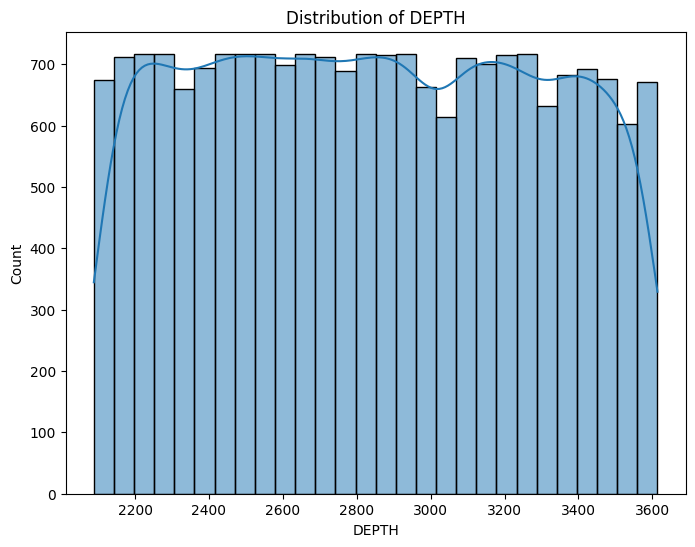

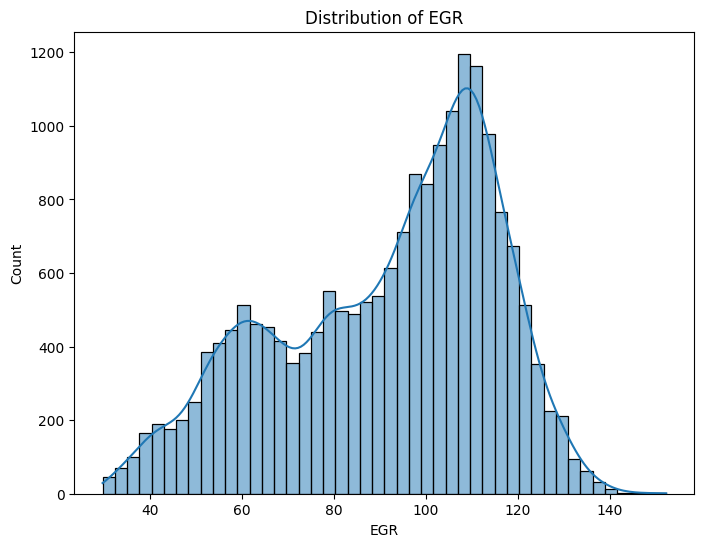

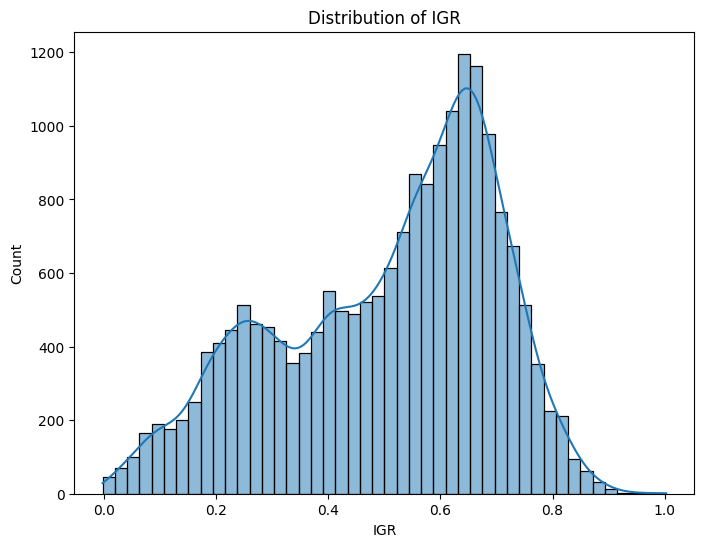

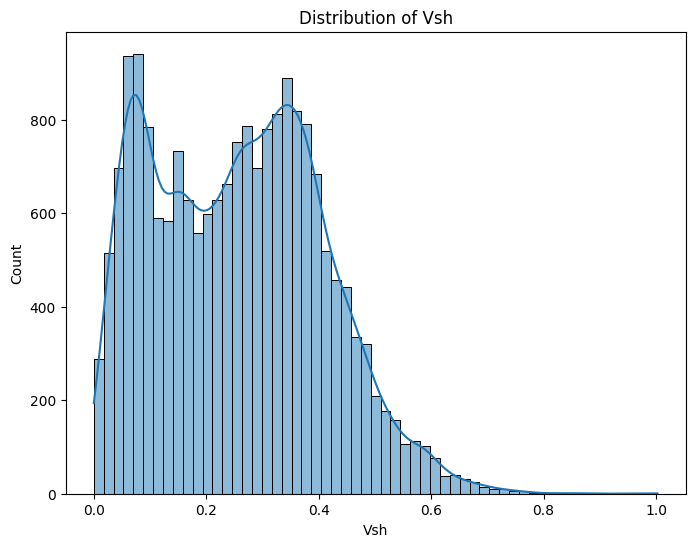

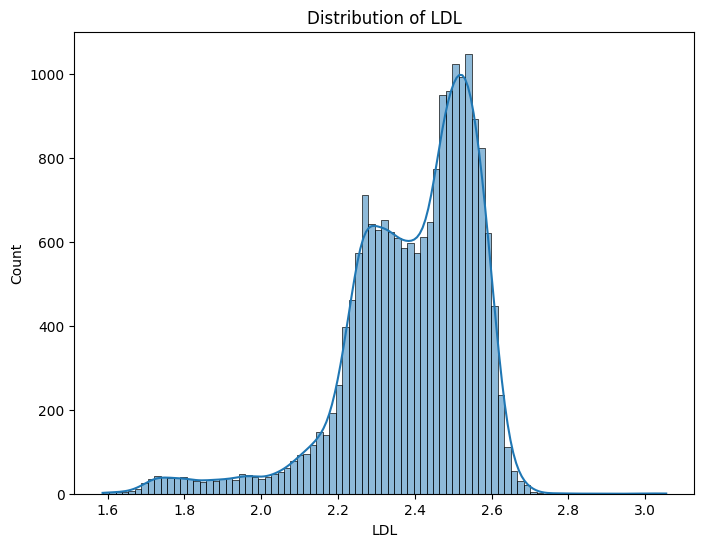

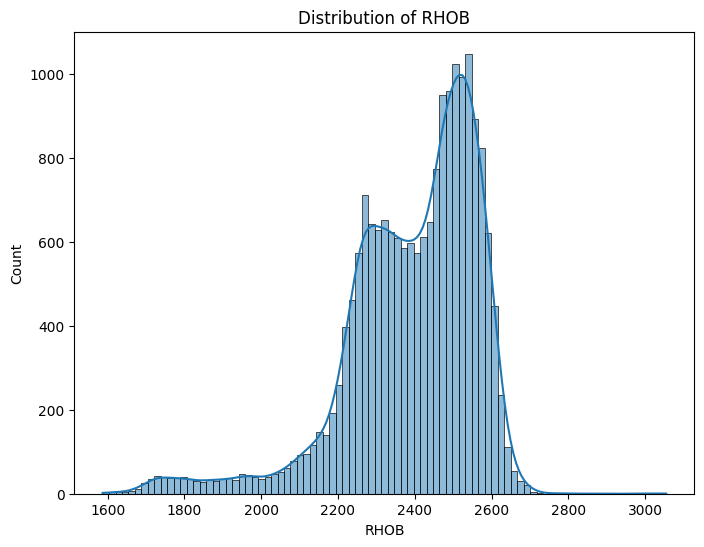

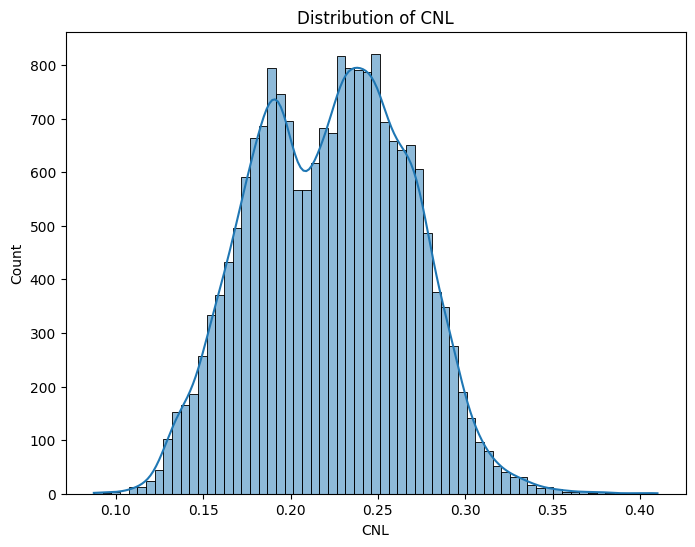

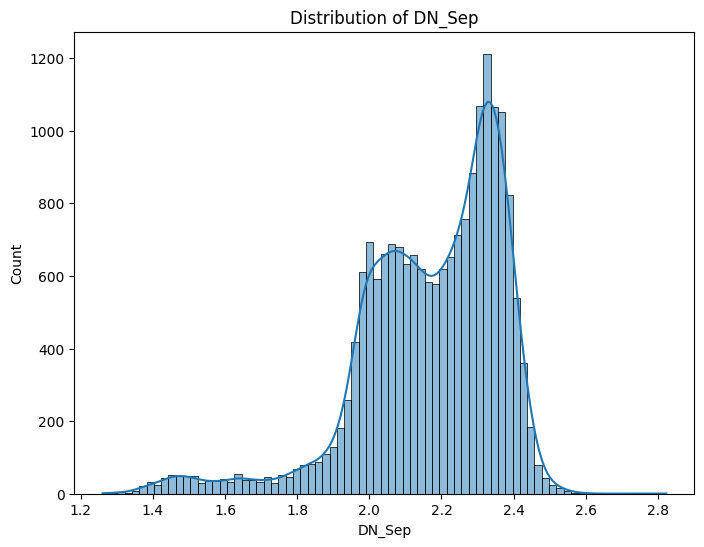

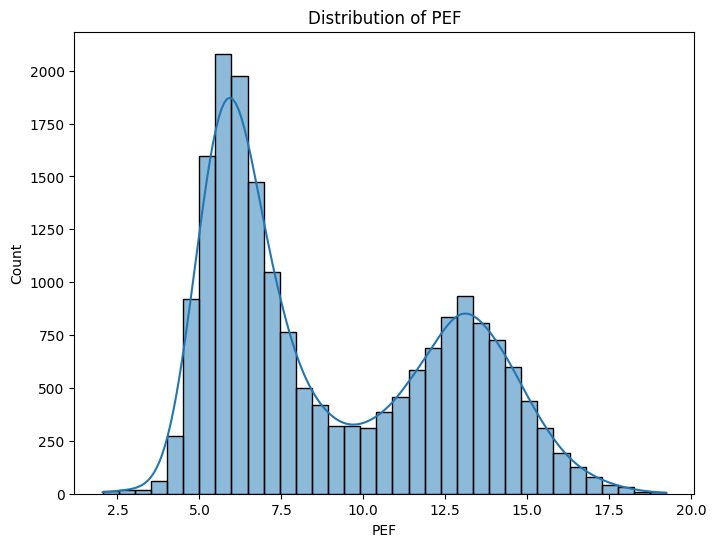

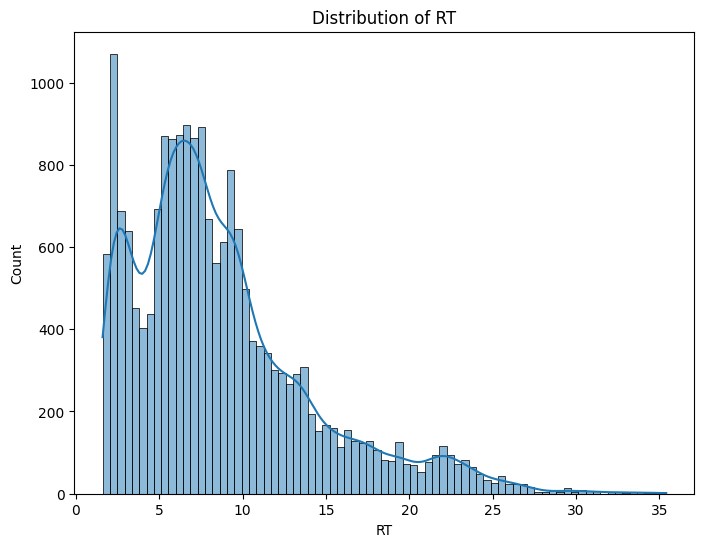

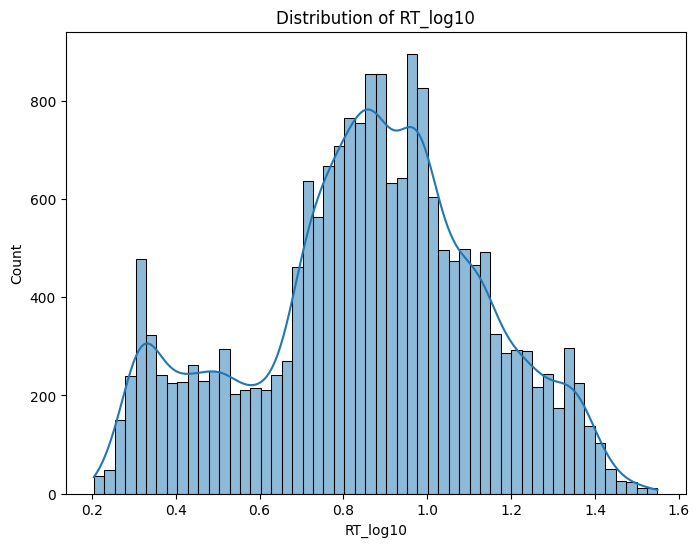

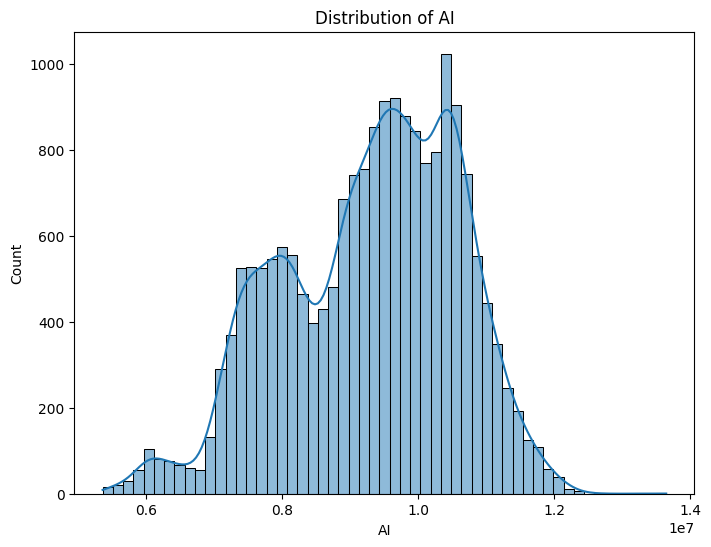

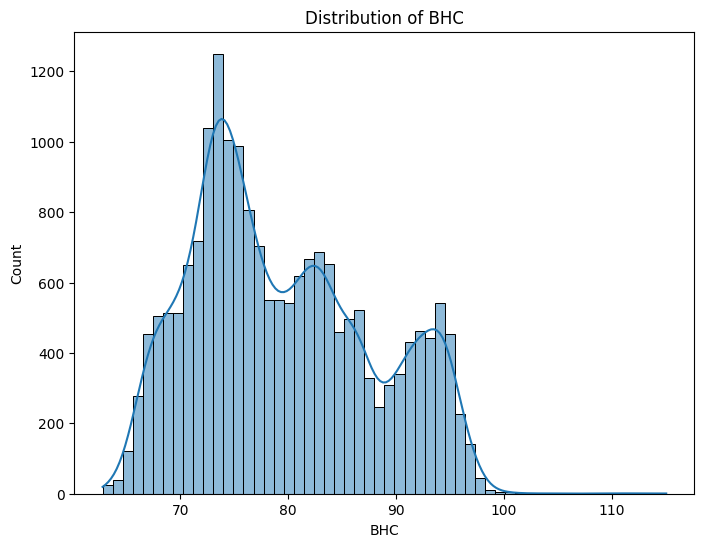

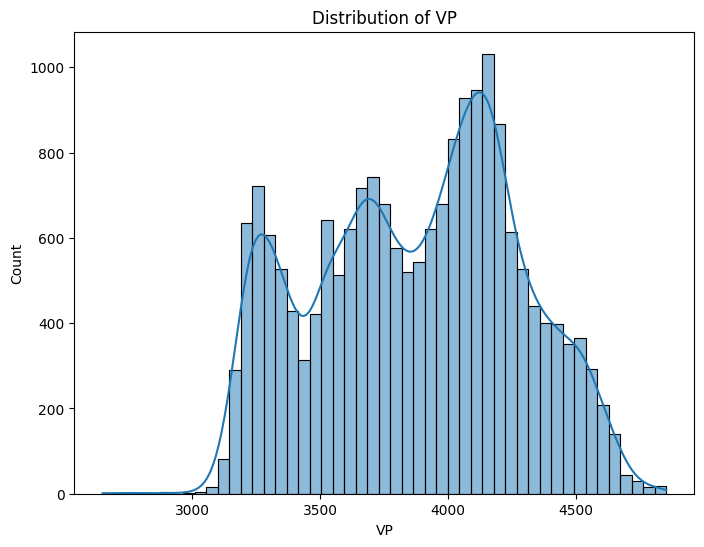

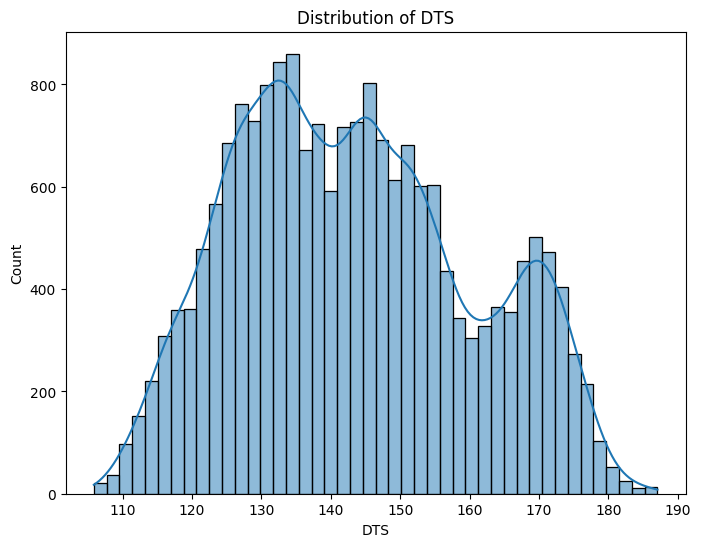

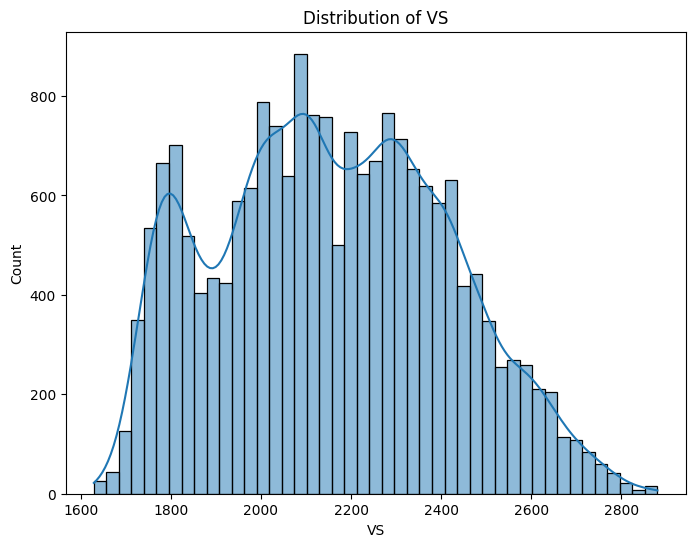

In [ ]:
plot_distributions(df_bangora_1_copy)

In [ ]:
skewness_bangora_1 = df_bangora_1_copy.skew()
print("Skewness for df_bangora_1_copy:")
print(skewness_bangora_1)

Skewness for df_bangora_1_copy:
DEPTH       0.023264
EGR        -0.509929
IGR        -0.509929
Vsh         0.304720
LDL        -1.328383
RHOB       -1.328383
CNL         0.030961
DN_Sep     -1.226095
PEF         0.487447
RT          1.260252
RT_log10   -0.242895
AI         -0.375871
BHC         0.404000
VP         -0.078864
DTS         0.255129
VS          0.161993
dtype: float64


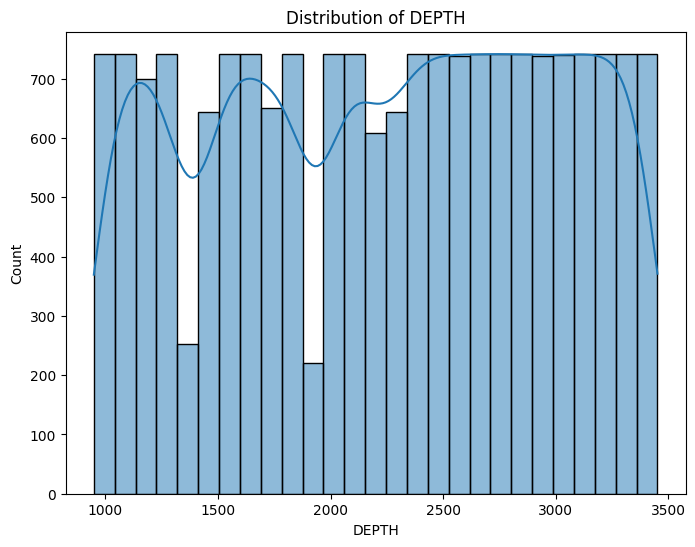

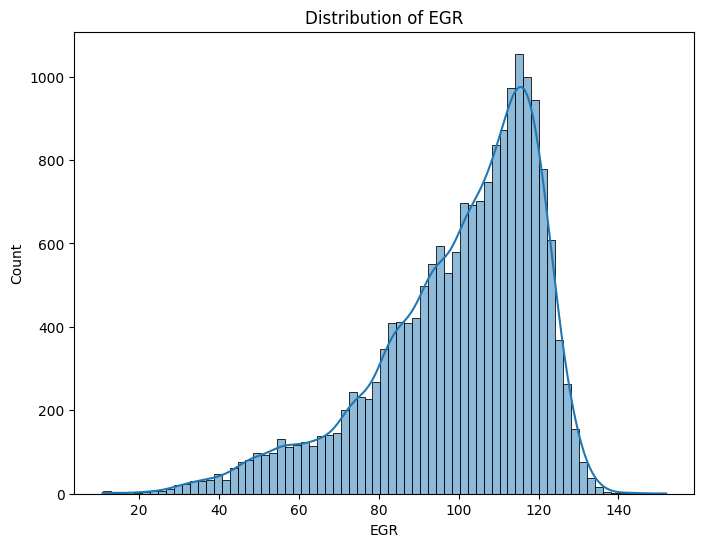

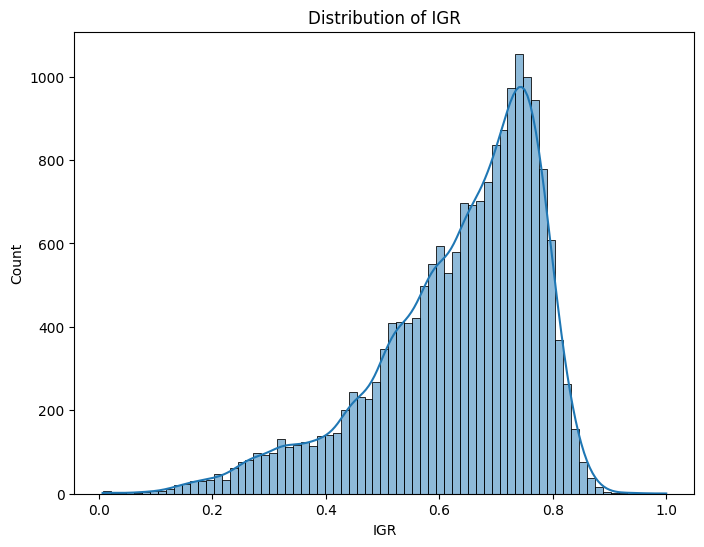

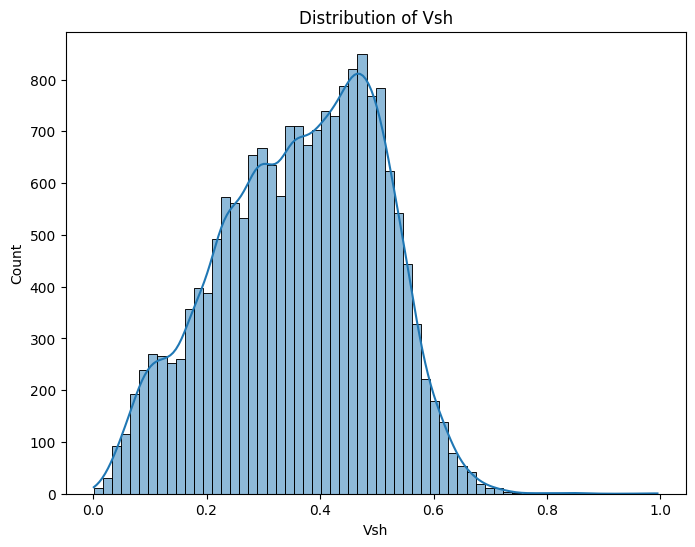

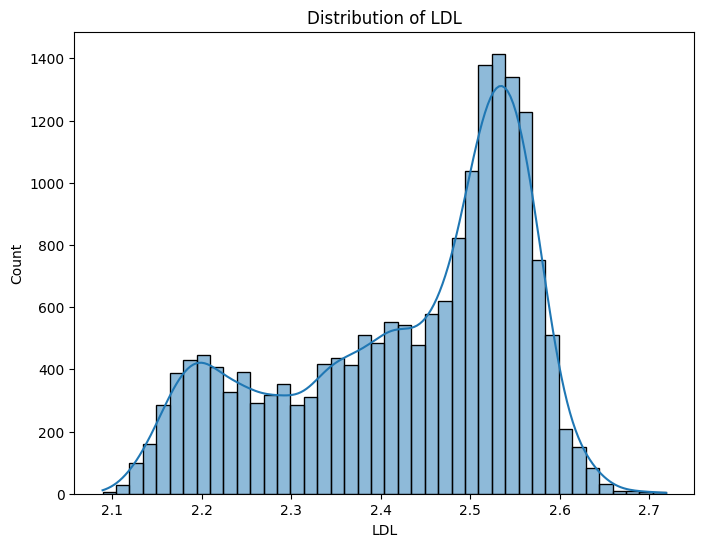

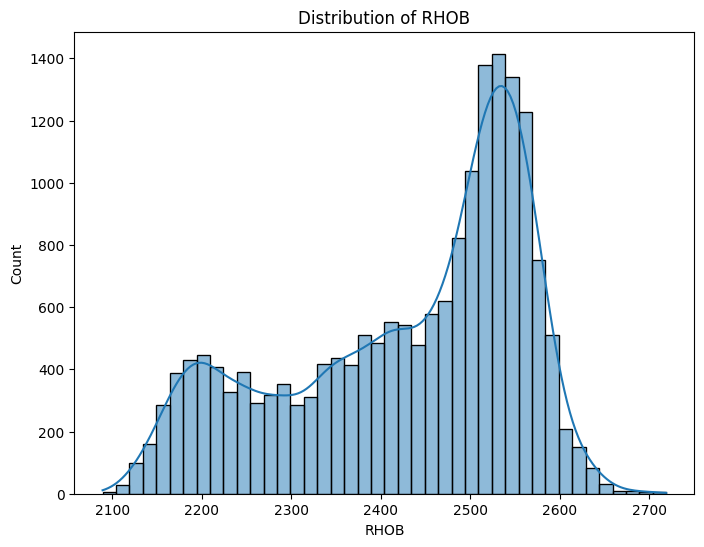

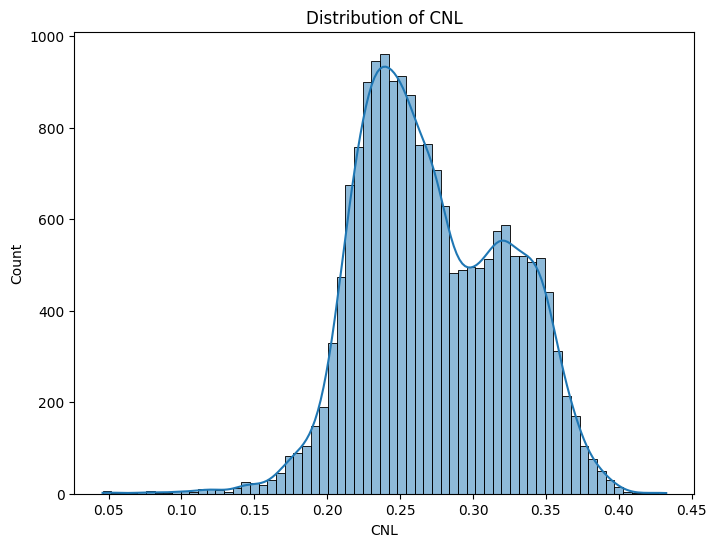

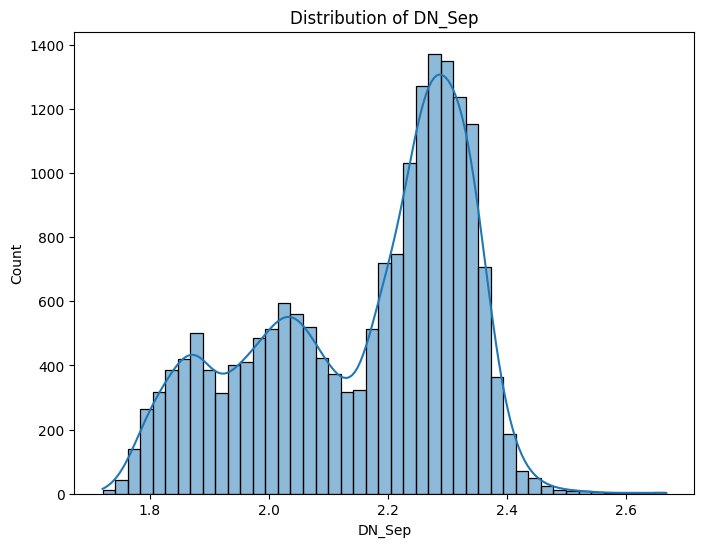

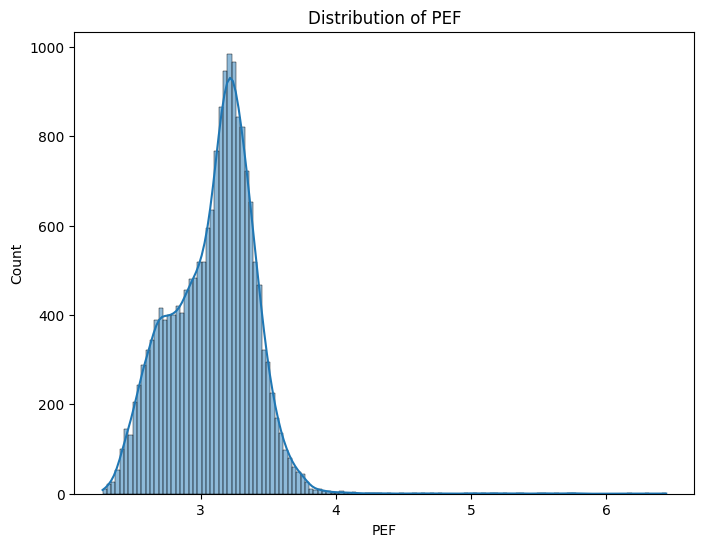

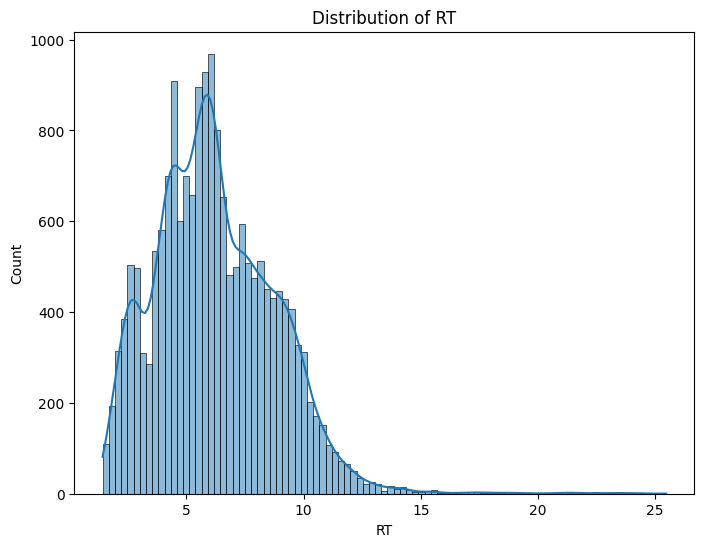

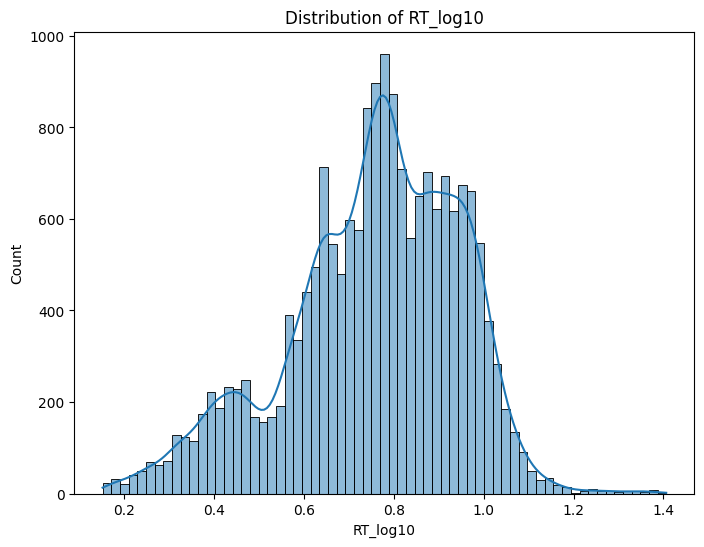

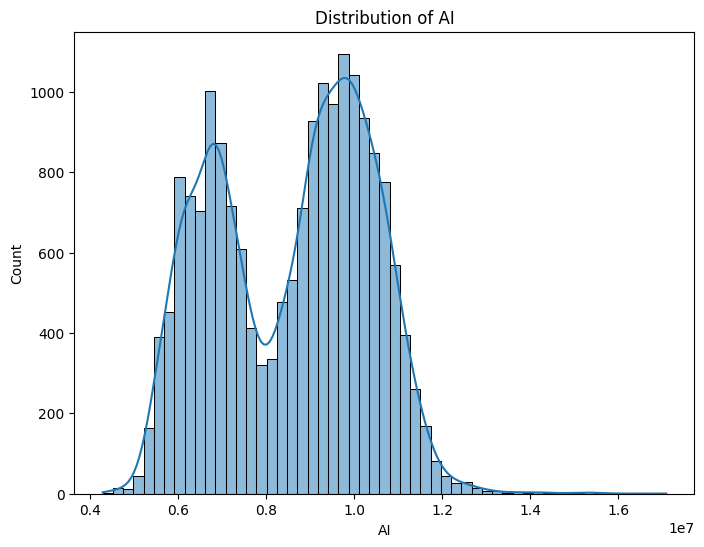

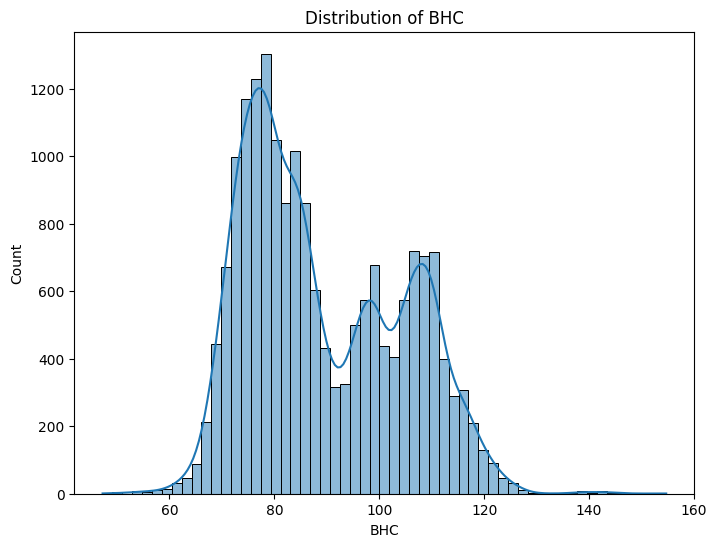

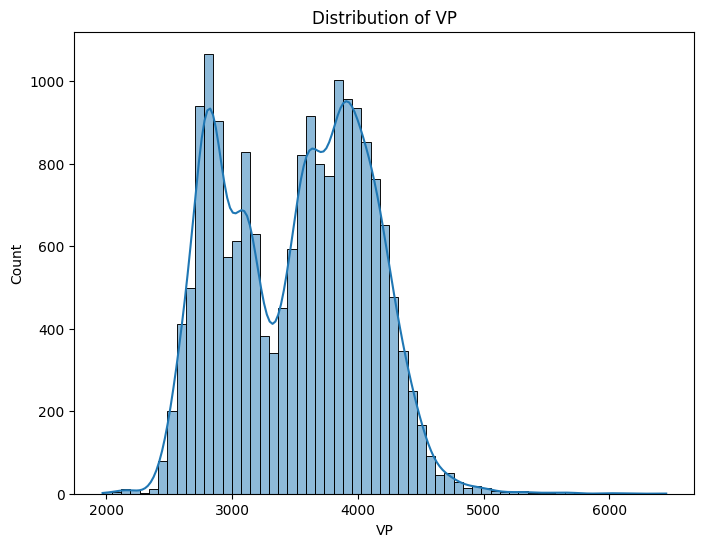

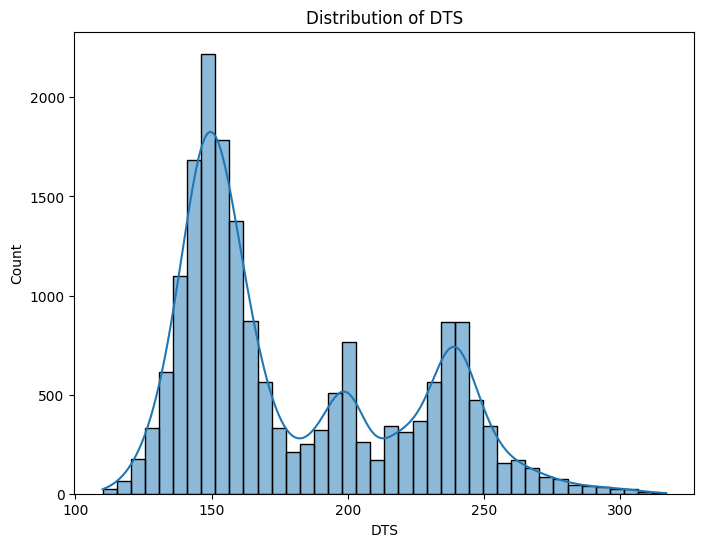

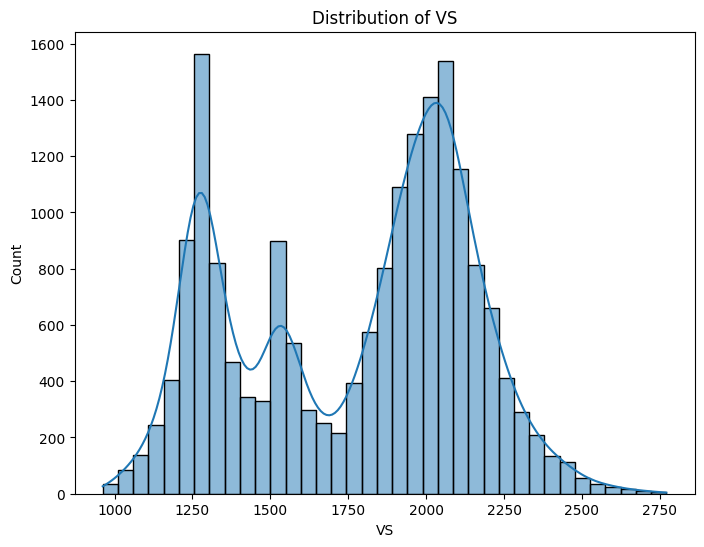

In [ ]:
plot_distributions(df_bangora_4_copy)

In [ ]:
skewness_bangora_4 = df_bangora_4_copy.skew()
print("Skewness for df_bangora_4_copy:")
print(skewness_bangora_4)

Skewness for df_bangora_4_copy:
DEPTH      -0.100761
EGR        -1.050169
IGR        -1.050169
Vsh        -0.237434
LDL        -0.646528
RHOB       -0.646528
CNL         0.107355
DN_Sep     -0.546655
PEF         0.325373
RT          0.794437
RT_log10   -0.531422
AI         -0.070575
BHC         0.458069
VP          0.037669
DTS         0.722493
VS         -0.246362
dtype: float64


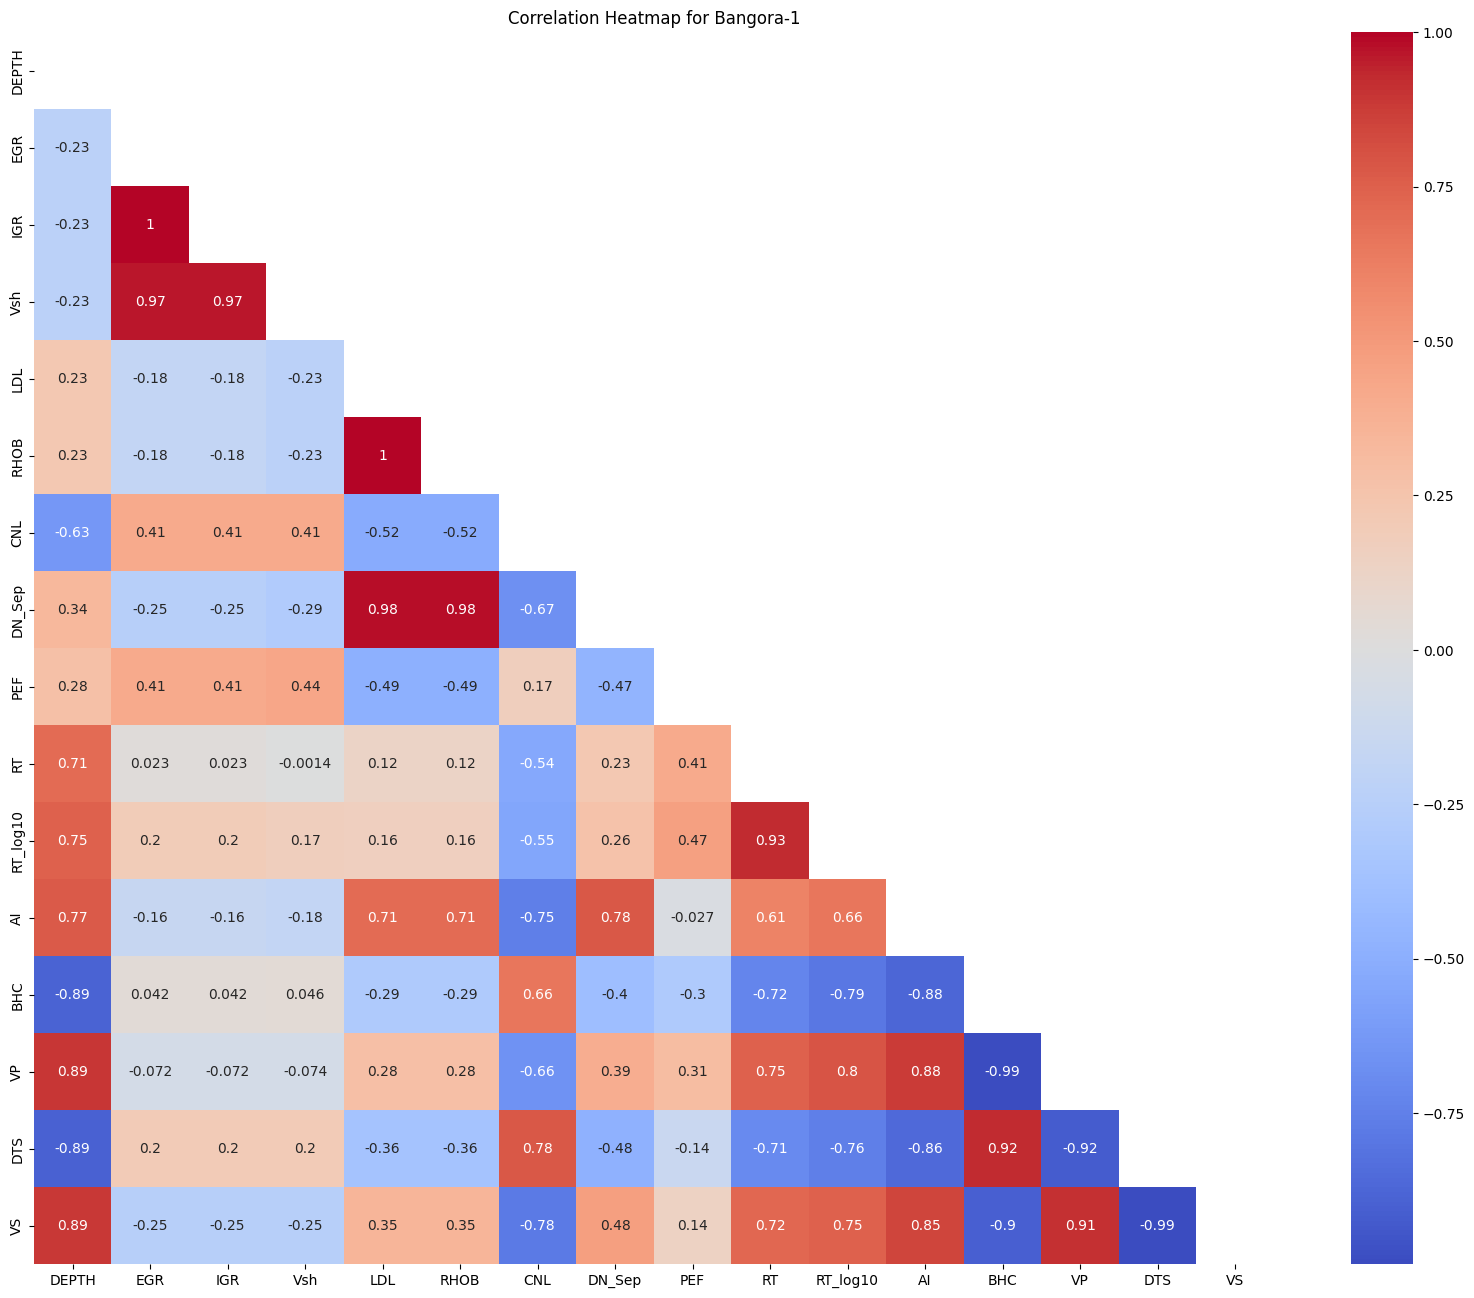

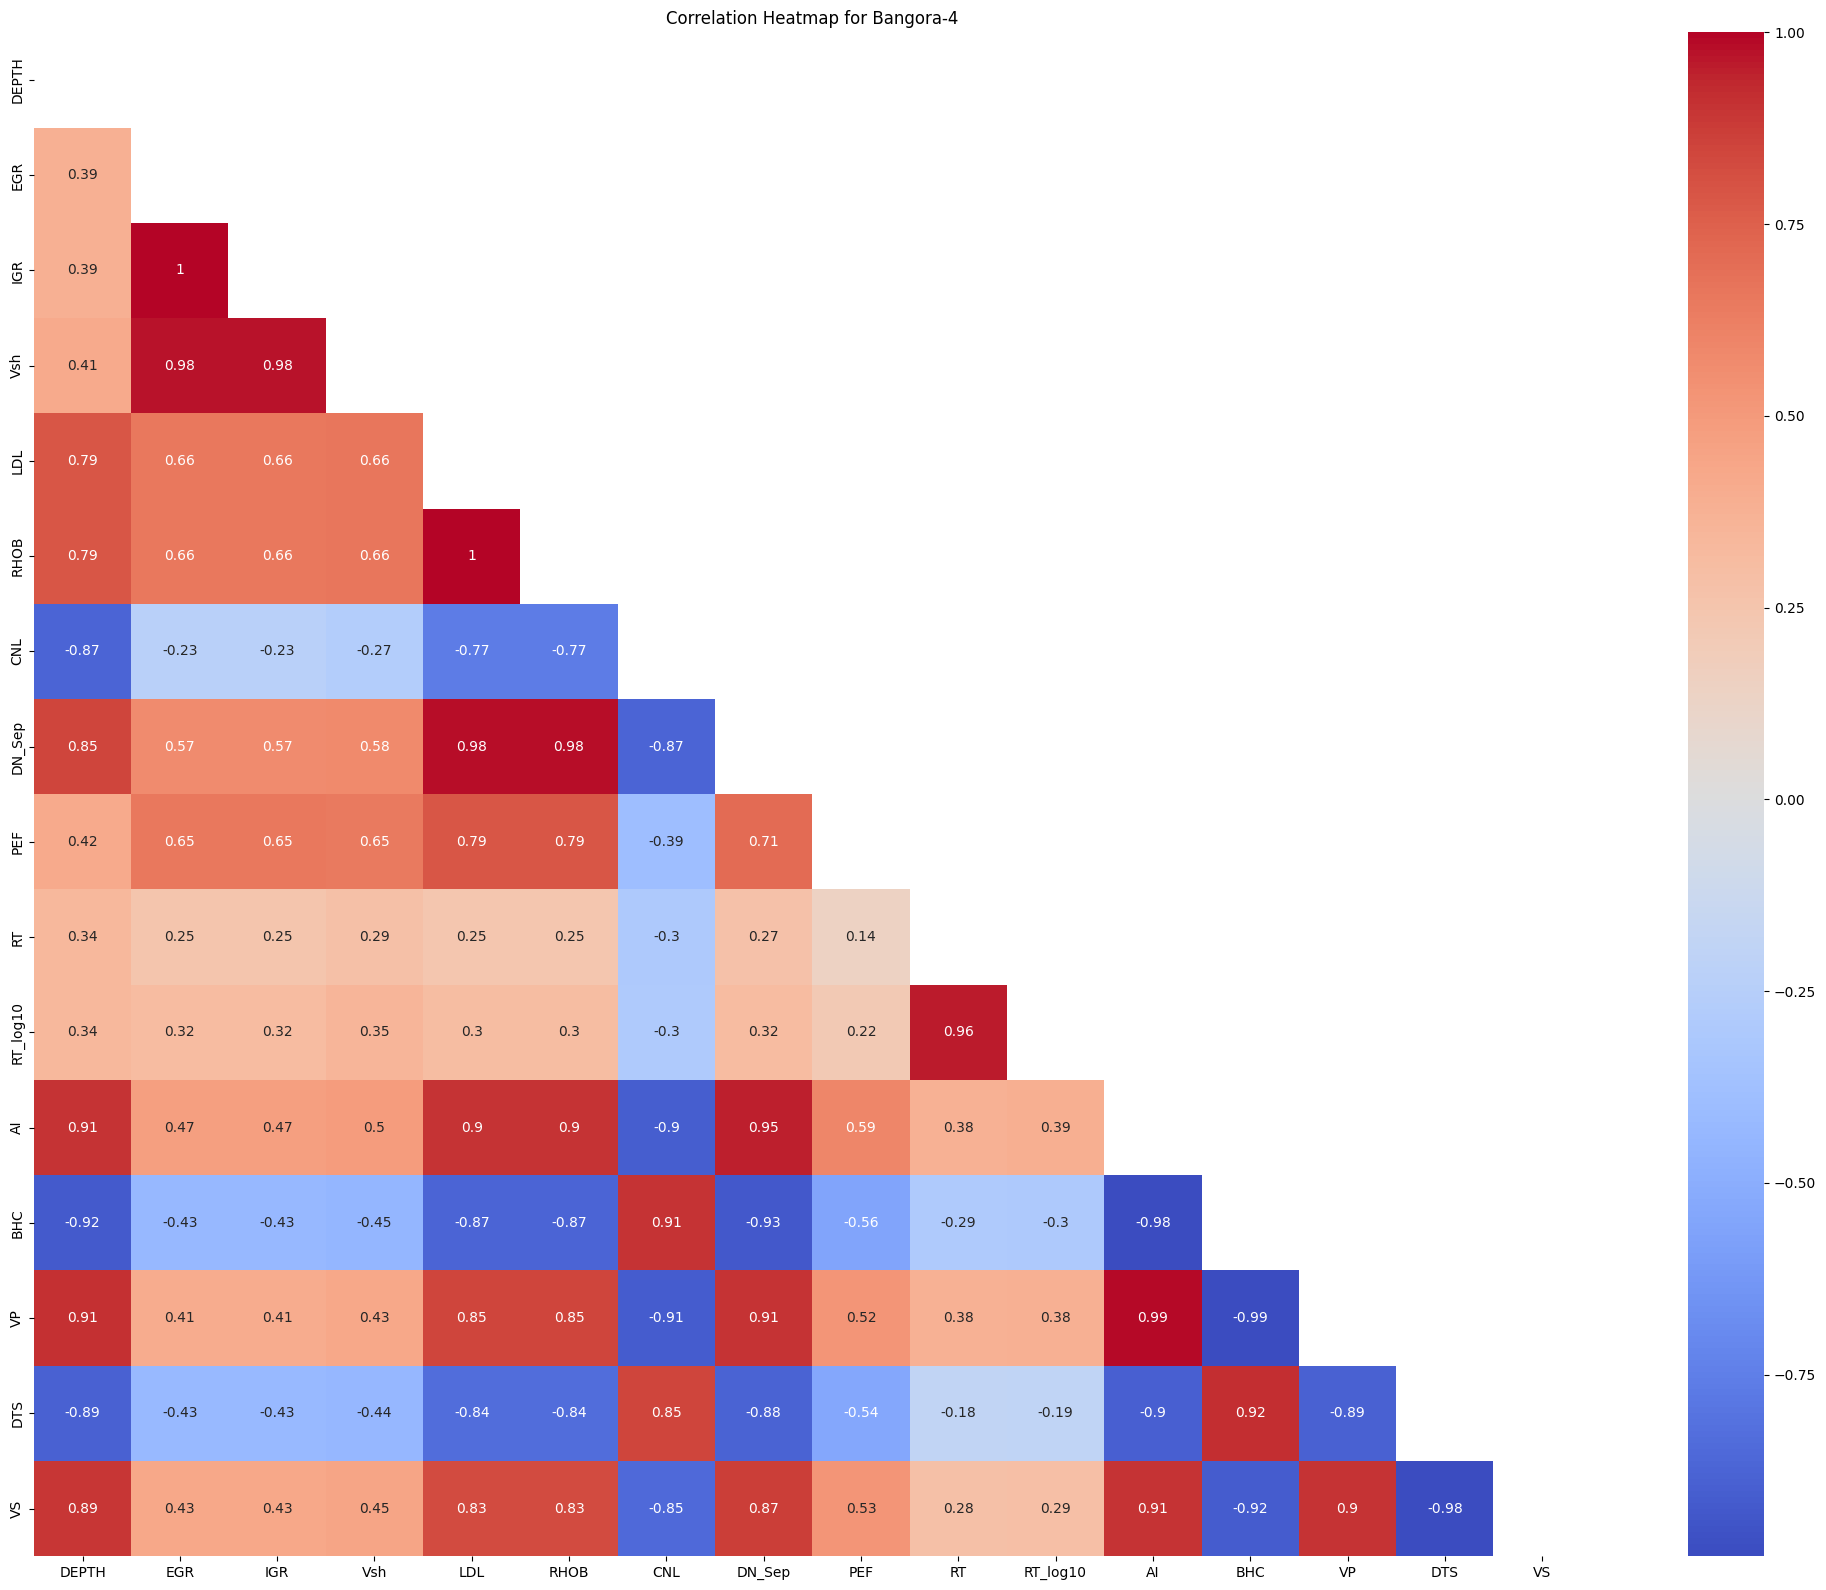

In [ ]:
corr_matrix1 = df_bangora_1_copy.corr()
corr_matrix4 = df_bangora_4_copy.corr()

mask1 = np.triu(corr_matrix1)
mask4 = np.triu(corr_matrix4)

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix1, mask=mask1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Bangora-1")

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix4, mask=mask4, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Bangora-4")

plt.tight_layout()
plt.show()

In [ ]:
df_bangora_1_copy['well_id'] = 1
df_bangora_4_copy['well_id'] = 4

# Concatenate the two dataframes
combined_df = pd.concat([df_bangora_1_copy, df_bangora_4_copy], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL  \
0  2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896   
1  2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563   
2  2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436   
3  2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443   
4  2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501   

    DN_Sep    PEF        RT  RT_log10            AI        BHC           VP  \
0  2.18604  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
1  2.13937  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2  2.12964  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
3  2.16257  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
4  2.18499  5.961  5.899687  0.770829  8.192206e+06  91.527000  3330.164869   

         DTS           VS  well_id  
0  173.97000  1752.026211        1  
1  173.12399  1760.587888        1  
2  173.12399  1760.587888        1  
3  172.61501  1765.779233        1  
4  171.91701  1772.948471        1

In [ ]:
combined_df_copy = combined_df.copy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features_for_clustering = ['Vsh', 'RHOB', 'CNL', 'PEF','RT','VP']
X = combined_df_copy[features_for_clustering]

# Initialize the Scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

print("\nFeatures have been scaled. The first 5 rows of scaled data:")
print(X_scaled[:5])


Features have been scaled. The first 5 rows of scaled data:
[[ 0.25862389  0.34656764  0.59456014  0.3289711  -0.42789206 -0.74330174]
 [ 0.42984955  0.02497006  0.53224642  0.23373481 -0.40922236 -0.74281793]
 [ 0.42984955 -0.04578155  0.50848113  0.09645273 -0.3905866  -0.74281793]
 [ 0.55984828  0.16647328  0.50979103  0.0078018  -0.35791148 -0.72520492]
 [ 0.67596606  0.31440846  0.52064447 -0.04437549 -0.35791148 -0.70455671]]


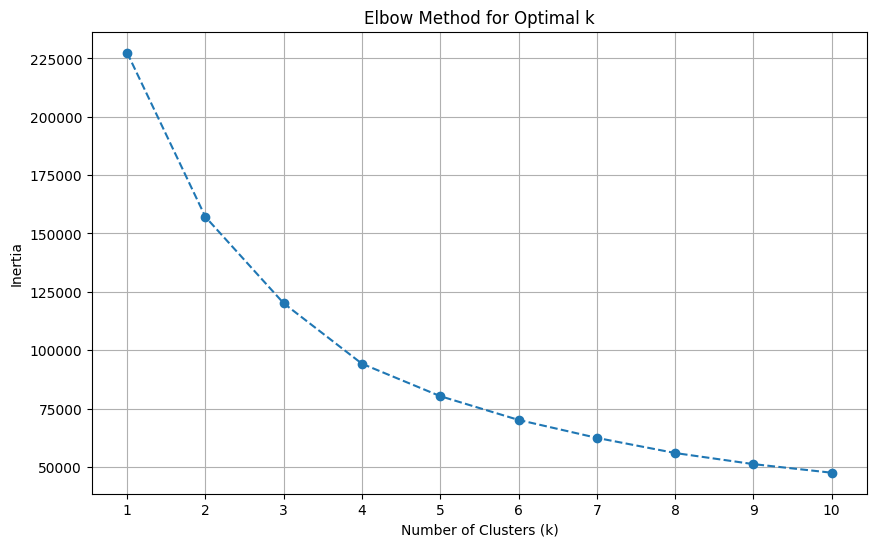

In [ ]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [ ]:
# We confirmed K=3 is a good choice. Let's build the final model.
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit the model and predict the clusters
combined_df_copy['Facies_Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nK-Means model with {k} clusters has been trained and applied.")
print("Here's the data with the new cluster labels:")
print(combined_df_copy.head())


K-Means model with 3 clusters has been trained and applied.
Here's the data with the new cluster labels:
       DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL  \
0  2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896   
1  2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563   
2  2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436   
3  2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443   
4  2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501   

    DN_Sep    PEF        RT  RT_log10            AI        BHC           VP  \
0  2.18604  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
1  2.13937  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2  2.12964  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
3  2.16257  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
4  2.18499  5.961  5.899687  0.770829  8.192206e+06  9

In [ ]:
# Analyze the cluster centers to interpret them
cluster_summary = combined_df_copy.groupby('Facies_Cluster')[features_for_clustering].mean()

print("\nAverage log values for each cluster:")
print(cluster_summary)


Average log values for each cluster:
                     Vsh         RHOB       CNL        PEF         RT  \
Facies_Cluster                                                          
0               0.389666  2525.537349  0.233310   4.206779   6.816547   
1               0.247093  2394.217810  0.202177  10.773057  12.084467   
2               0.257325  2275.917854  0.302839   4.785979   4.546292   

                         VP  
Facies_Cluster               
0               3865.037479  
1               4153.714390  
2               3095.100302  


In [ ]:
# --- Interpretation and Labeling ---
# Based on the output above and geological principles:
# - The cluster with the LOWEST average GR is 'Clean Sand'.
# - The cluster with the HIGHEST average GR is 'Shale'.
# - The cluster with the intermediate GR is 'Shaly Sand'.

# Find the cluster numbers corresponding to each facies
sand_cluster = cluster_summary['Vsh'].idxmin()
shale_cluster = cluster_summary['Vsh'].idxmax()
# The remaining cluster is shaly sand
shaly_sand_cluster = [c for c in range(k) if c not in [sand_cluster, shale_cluster]][0]


# Create a mapping from cluster number to a meaningful name
facies_map = {
    sand_cluster: 'Clean Sand',
    shaly_sand_cluster: 'Shaly Sand',
    shale_cluster: 'Shale'
}

# Apply the mapping to create the final lithofacies column
combined_df_copy['Lithofacies'] = combined_df_copy['Facies_Cluster'].map(facies_map)

print("\nClusters have been interpreted and labeled:")
print(combined_df_copy[['DEPTH', 'EGR', 'Facies_Cluster', 'Lithofacies']].head())


Clusters have been interpreted and labeled:
       DEPTH        EGR  Facies_Cluster Lithofacies
0  2088.3959  108.55186               2  Shaly Sand
1  2088.4719  111.38565               2  Shaly Sand
2  2088.5479  111.38565               2  Shaly Sand
3  2088.6239  113.42975               0       Shale
4  2088.6999  115.18416               0       Shale


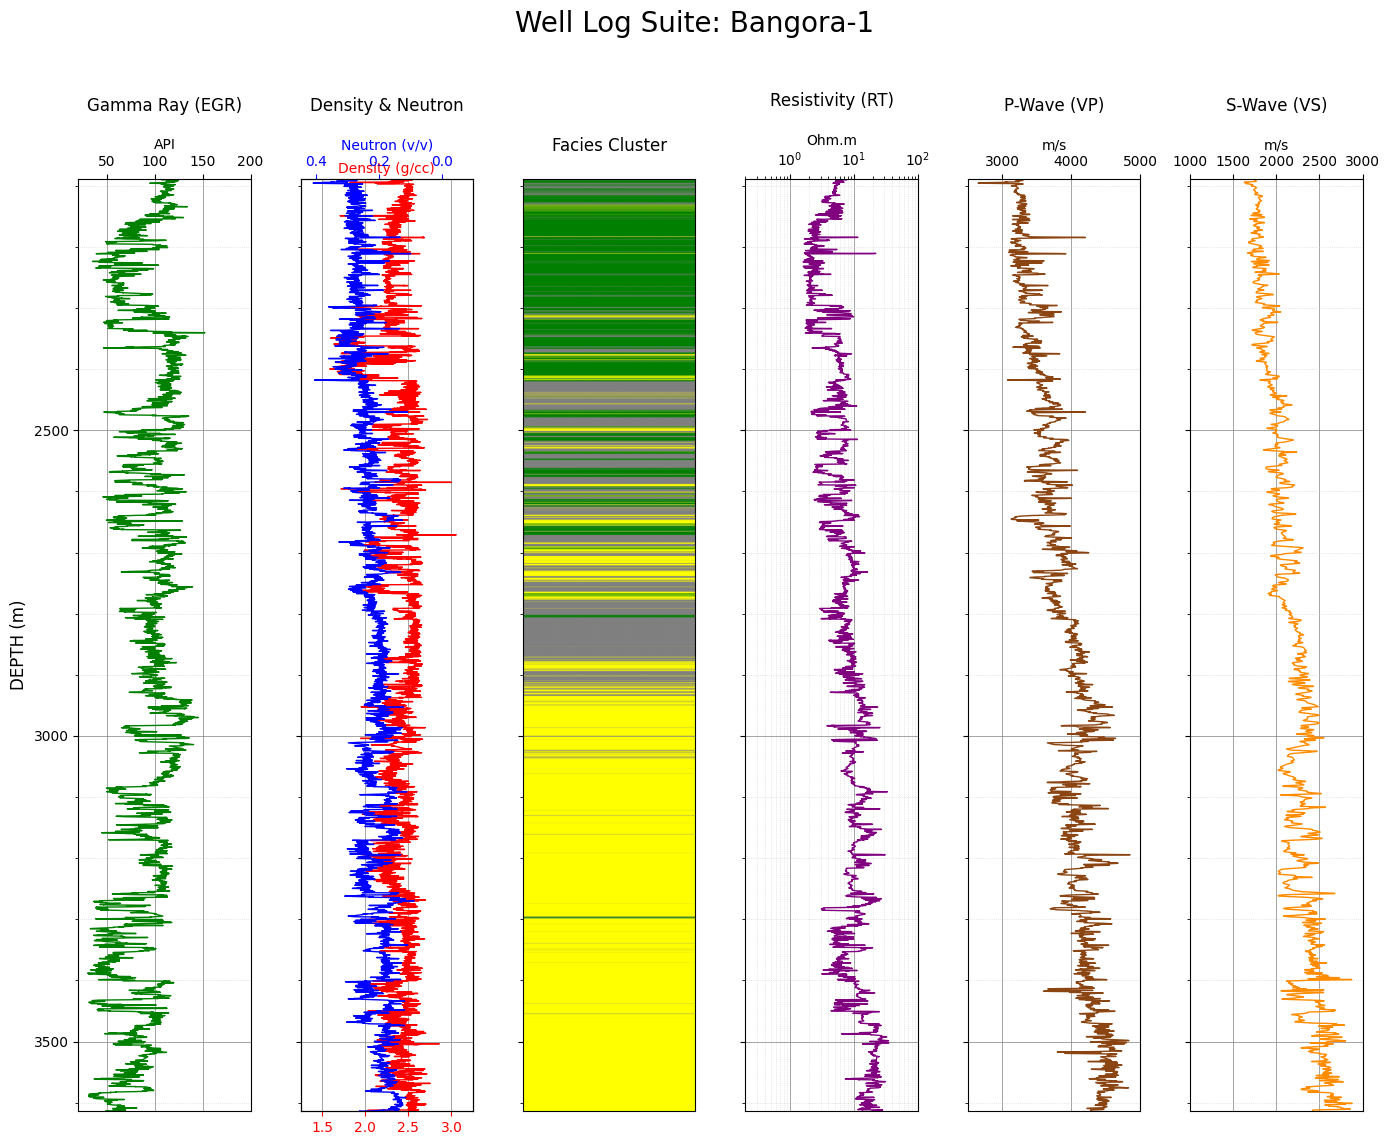

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator


# Filter for Bangora-1 well (well_id == 1)
bangora_1_df = combined_df_copy[combined_df_copy['well_id'] == 1].copy()
bangora_1_df.sort_values(by='DEPTH', inplace=True)

# --- 2. Plot Setup ---
# We will create 6 tracks (subplots)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 12), sharey=True)
fig.suptitle('Well Log Suite: Bangora-1', fontsize=20, y=0.95)

# Define a consistent color scheme for the logs
log_colors = {
    'EGR': 'green',
    'LDL': 'red',
    'CNL': 'blue',
    'RT': 'purple',
    'VP': 'saddlebrown',
    'VS': 'darkorange'
}

# --- 3. Plotting Each Track ---

# == Track 1: Gamma Ray (EGR) ==
ax = axes[0]
ax.plot(bangora_1_df['EGR'], bangora_1_df['DEPTH'], color=log_colors['EGR'], lw=1)
ax.set_title('Gamma Ray (EGR)', pad=20)
ax.set_xlabel('API')
ax.set_xlim(20, 200)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

# == Track 2: Density (LDL) and Neutron (CNL) ==
ax = axes[1]
# Plot LDL (Density) on the primary x-axis
ax.plot(bangora_1_df['LDL'], bangora_1_df['DEPTH'], color=log_colors['LDL'], lw=1)
ax.set_title('Density & Neutron', pad=20)
ax.set_xlabel('Density (g/cc)')
ax.set_xlim(1.25, 3.25)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.xaxis.label.set_color(log_colors['LDL'])
ax.tick_params(axis='x', colors=log_colors['LDL'])
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# Create a twin axis for CNL (Neutron)
ax2 = ax.twiny()
ax2.plot(bangora_1_df['CNL'], bangora_1_df['DEPTH'], color=log_colors['CNL'], lw=1)
ax2.set_xlabel('Neutron (v/v)')
ax2.set_xlim(0.45, -0.1) # Neutron scale is typically reversed
ax2.xaxis.set_label_position('top')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.label.set_color(log_colors['CNL'])
ax2.tick_params(axis='x', colors=log_colors['CNL'])

# == Track 3: Facies Cluster ==
ax = axes[2]
# We use pcolormesh to create a color-fill plot for the categorical facies data
facies_data = bangora_1_df['Facies_Cluster'].values
# Reshape for plotting
facies_column = np.repeat(facies_data.reshape(-1, 1), 10, axis=1)
# Create a discrete colormap
facies_colors = ['grey', 'yellow', 'green'] # Colors for clusters
cmap_facies = mcolors.ListedColormap(facies_colors)
bounds = np.arange(-0.5, len(facies_colors), 1)
norm = mcolors.BoundaryNorm(bounds, cmap_facies.N)

ax.imshow(facies_column, aspect='auto', cmap=cmap_facies, norm=norm,
          extent=[0, 1, bangora_1_df['DEPTH'].max(), bangora_1_df['DEPTH'].min()])
ax.set_title('Facies Cluster', pad=20)
ax.set_xticks([]) # No x-ticks for the facies track
ax.set_xlabel('')

# == Track 4: Resistivity (RT) ==
ax = axes[3]
ax.plot(bangora_1_df['RT'], bangora_1_df['DEPTH'], color=log_colors['RT'], lw=1)
ax.set_title('Resistivity (RT)', pad=20)
ax.set_xlabel('Ohm.m')
ax.set_xscale('log') # Resistivity is often plotted on a log scale
ax.set_xlim(0.2, 100)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')


# == Track 5: P-Wave Velocity (VP) ==
ax = axes[4]
ax.plot(bangora_1_df['VP'], bangora_1_df['DEPTH'], color=log_colors['VP'], lw=1)
ax.set_title('P-Wave (VP)', pad=20)
ax.set_xlabel('m/s')
ax.set_xlim(2500, 5000)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

# == Track 6: S-Wave Velocity (VS) ==
ax = axes[5]
ax.plot(bangora_1_df['VS'], bangora_1_df['DEPTH'], color=log_colors['VS'], lw=1)
ax.set_title('S-Wave (VS)', pad=20)
ax.set_xlabel('m/s')
ax.set_xlim(1000, 3000)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')


# --- 4. Final Formatting ---
# Apply settings to all axes
for ax in axes:
    ax.invert_yaxis() # Invert depth axis to go downwards
    ax.yaxis.set_major_locator(MultipleLocator(500))
    ax.yaxis.set_minor_locator(MultipleLocator(100))

# Set the y-axis label only for the first plot
axes[0].set_ylabel('DEPTH (m)', fontsize=12)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust rect to make space for suptitle
plt.show()


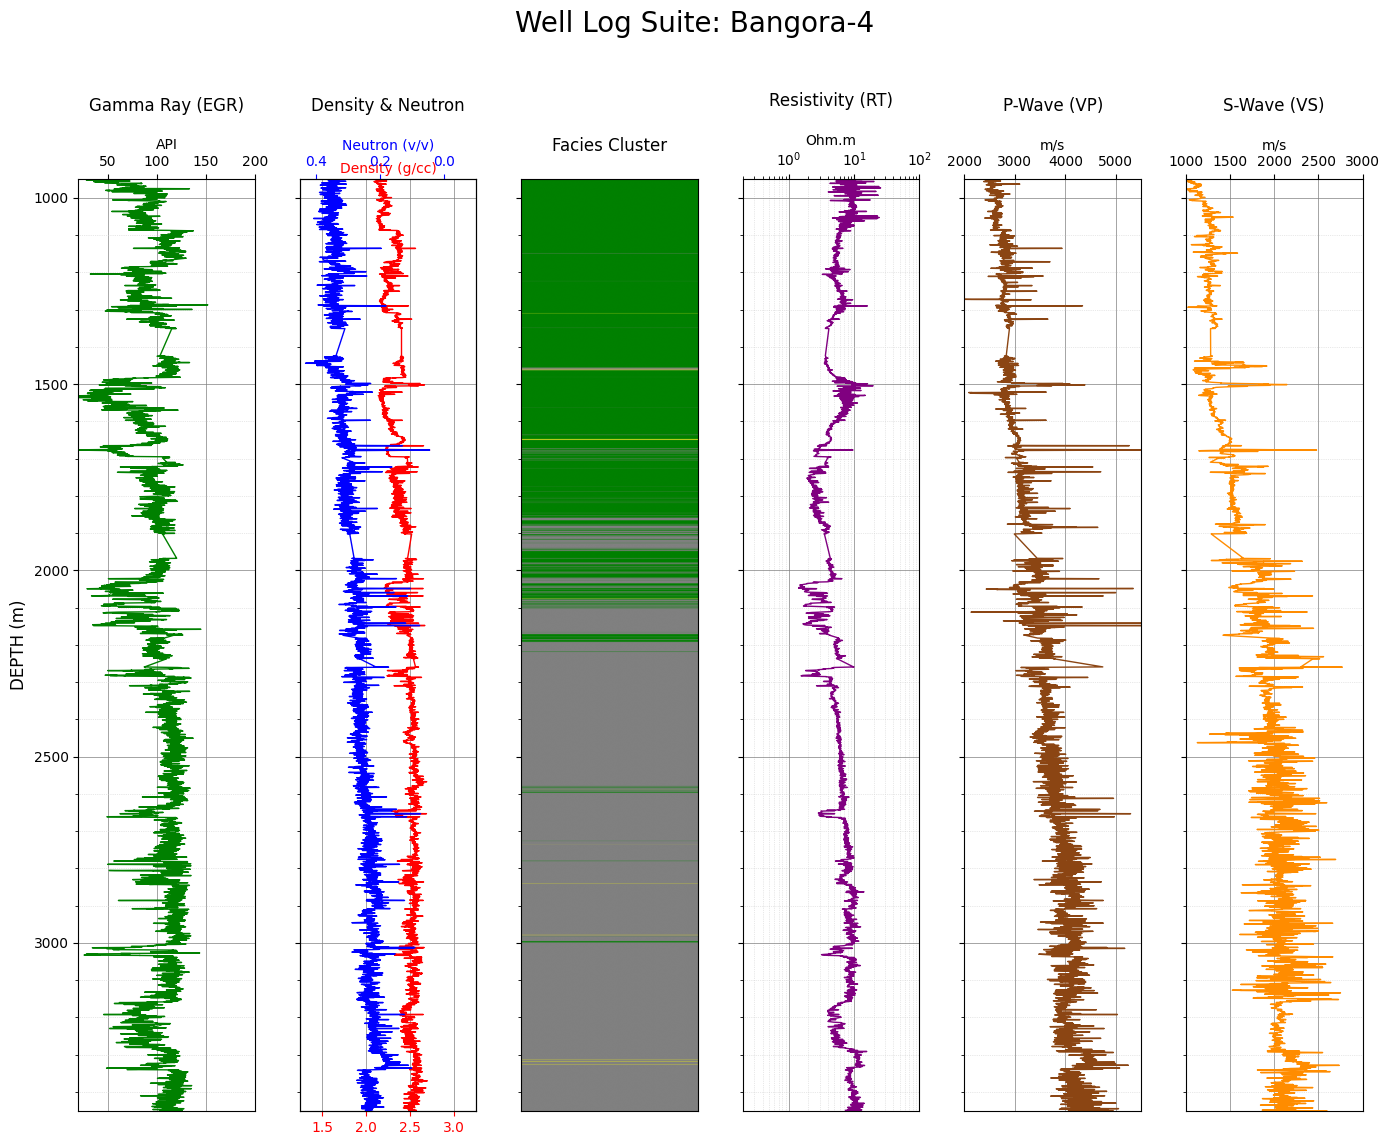

In [ ]:

# Filter for Bangora-4 well (well_id == 4)
bangora_4_df = combined_df_copy[combined_df_copy['well_id'] == 4].copy()
bangora_4_df.sort_values(by='DEPTH', inplace=True)

# --- 2. Plot Setup ---
# We will create 6 tracks (subplots)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 12), sharey=True)
fig.suptitle('Well Log Suite: Bangora-4', fontsize=20, y=0.95)

# Define a consistent color scheme for the logs
log_colors = {
    'EGR': 'green',
    'LDL': 'red',
    'CNL': 'blue',
    'RT': 'purple',
    'VP': 'saddlebrown',
    'VS': 'darkorange'
}

# --- 3. Plotting Each Track ---

# == Track 1: Gamma Ray (EGR) ==
ax = axes[0]
ax.plot(bangora_4_df['EGR'], bangora_4_df['DEPTH'], color=log_colors['EGR'], lw=1)
ax.set_title('Gamma Ray (EGR)', pad=20)
ax.set_xlabel('API')
ax.set_xlim(20, 200)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

# == Track 2: Density (LDL) and Neutron (CNL) ==
ax = axes[1]
# Plot LDL (Density) on the primary x-axis
ax.plot(bangora_4_df['LDL'], bangora_4_df['DEPTH'], color=log_colors['LDL'], lw=1)
ax.set_title('Density & Neutron', pad=20)
ax.set_xlabel('Density (g/cc)')
ax.set_xlim(1.25, 3.25)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.xaxis.label.set_color(log_colors['LDL'])
ax.tick_params(axis='x', colors=log_colors['LDL'])
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# Create a twin axis for CNL (Neutron)
ax2 = ax.twiny()
ax2.plot(bangora_4_df['CNL'], bangora_4_df['DEPTH'], color=log_colors['CNL'], lw=1)
ax2.set_xlabel('Neutron (v/v)')
ax2.set_xlim(0.45, -0.1) # Neutron scale is typically reversed
ax2.xaxis.set_label_position('top')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.label.set_color(log_colors['CNL'])
ax2.tick_params(axis='x', colors=log_colors['CNL'])

# == Track 3: Facies Cluster ==
ax = axes[2]
# We use pcolormesh to create a color-fill plot for the categorical facies data
facies_data = bangora_4_df['Facies_Cluster'].values
# Reshape for plotting
facies_column = np.repeat(facies_data.reshape(-1, 1), 10, axis=1)
# Create a discrete colormap
facies_colors = ['grey', 'yellow', 'green'] # Colors for clusters
cmap_facies = mcolors.ListedColormap(facies_colors)
bounds = np.arange(-0.5, len(facies_colors), 1)
norm = mcolors.BoundaryNorm(bounds, cmap_facies.N)

ax.imshow(facies_column, aspect='auto', cmap=cmap_facies, norm=norm,
          extent=[0, 1, bangora_4_df['DEPTH'].max(), bangora_4_df['DEPTH'].min()])
ax.set_title('Facies Cluster', pad=20)
ax.set_xticks([]) # No x-ticks for the facies track
ax.set_xlabel('')

# == Track 4: Resistivity (RT) ==
ax = axes[3]
ax.plot(bangora_4_df['RT'], bangora_4_df['DEPTH'], color=log_colors['RT'], lw=1)
ax.set_title('Resistivity (RT)', pad=20)
ax.set_xlabel('Ohm.m')
ax.set_xscale('log') # Resistivity is often plotted on a log scale
ax.set_xlim(0.2, 100)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')


# == Track 5: P-Wave Velocity (VP) ==
ax = axes[4]
ax.plot(bangora_4_df['VP'], bangora_4_df['DEPTH'], color=log_colors['VP'], lw=1)
ax.set_title('P-Wave (VP)', pad=20)
ax.set_xlabel('m/s')
ax.set_xlim(2000, 5500)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

# == Track 6: S-Wave Velocity (VS) ==
ax = axes[5]
ax.plot(bangora_4_df['VS'], bangora_4_df['DEPTH'], color=log_colors['VS'], lw=1)
ax.set_title('S-Wave (VS)', pad=20)
ax.set_xlabel('m/s')
ax.set_xlim(1000, 3000)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')


# --- 4. Final Formatting ---
# Apply settings to all axes
for ax in axes:
    ax.invert_yaxis() # Invert depth axis to go downwards
    ax.yaxis.set_major_locator(MultipleLocator(500))
    ax.yaxis.set_minor_locator(MultipleLocator(100))

# Set the y-axis label only for the first plot
axes[0].set_ylabel('DEPTH (m)', fontsize=12)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust rect to make space for suptitle
plt.show()


In [ ]:
display(combined_df_copy.head())

DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL  \
0  2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896   
1  2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563   
2  2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436   
3  2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443   
4  2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501   

    DN_Sep    PEF        RT  RT_log10            AI        BHC           VP  \
0  2.18604  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
1  2.13937  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2  2.12964  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
3  2.16257  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
4  2.18499  5.961  5.899687  0.770829  8.192206e+06  91.527000  3330.164869   

         DTS           VS  well_id  Facies_Cluster Lithofacies  
0  173.97000  1752.026211        1               2  Shaly Sand  
1  173.12399  1760.587888        1               2  Shaly Sand  
2  173.12399  1760.587888        1               2  Shaly Sand  
3  172.61501  1765.779233        1               0       Shale  
4  171.91701  1772.948471        1               0       Shale

In [ ]:
combined_df_copy['RHO_S'] = combined_df_copy['RHOB'] * (combined_df_copy['VS']**2)
display(combined_df_copy.head())

DEPTH        EGR       IGR       Vsh    LDL       RHOB      CNL  \
0  2088.3959  108.55186  0.643868  0.349738  2.465  2464.9999  0.27896   
1  2088.4719  111.38565  0.667095  0.376300  2.415  2415.0000  0.27563   
2  2088.5479  111.38565  0.667095  0.376300  2.404  2404.0000  0.27436   
3  2088.6239  113.42975  0.683850  0.396466  2.437  2437.0000  0.27443   
4  2088.6999  115.18416  0.698231  0.414480  2.460  2460.0000  0.27501   

    DN_Sep    PEF        RT  RT_log10            AI        BHC           VP  \
0  2.18604  7.435  5.588121  0.747266  8.159202e+06  92.084000  3310.021285   
1  2.13937  7.059  5.671242  0.753678  7.994309e+06  92.077003  3310.272816   
2  2.12964  6.517  5.754212  0.759986  7.957896e+06  92.077003  3310.272816   
3  2.16257  6.167  5.899687  0.770829  8.089451e+06  91.822998  3319.429845   
4  2.18499  5.961  5.899687  0.770829  8.192206e+06  91.527000  3330.164869   

         DTS           VS  well_id  Facies_Cluster Lithofacies         RHO_S  
0  173.97000  1752.026211        1               2  Shaly Sand  7.566553e+09  
1  173.12399  1760.587888        1               2  Shaly Sand  7.485702e+09  
2  173.12399  1760.587888        1               2  Shaly Sand  7.451606e+09  
3  172.61501  1765.779233        1               0       Shale  7.598508e+09  
4  171.91701  1772.948471        1               0       Shale  7.732632e+09

In [ ]:
# Define the columns to be excluded from features
selected_features = ['DEPTH','Vsh', 'RHOB', 'CNL', 'DN_Sep', 'PEF', 'RT_log10', 'Facies_Cluster']

# Select features by dropping the excluded columns
features = combined_df_copy[selected_features]

# Select the target variable
target = combined_df_copy['RHO_S']

# Display the first few rows of the features and target
print("Features:")
display(features.head())
print("\nTarget:")
display(target.head())

Features:


DEPTH       Vsh       RHOB      CNL   DN_Sep    PEF  RT_log10  \
0  2088.3959  0.349738  2464.9999  0.27896  2.18604  7.435  0.747266   
1  2088.4719  0.376300  2415.0000  0.27563  2.13937  7.059  0.753678   
2  2088.5479  0.376300  2404.0000  0.27436  2.12964  6.517  0.759986   
3  2088.6239  0.396466  2437.0000  0.27443  2.16257  6.167  0.770829   
4  2088.6999  0.414480  2460.0000  0.27501  2.18499  5.961  0.770829   

   Facies_Cluster  
0               2  
1               2  
2               2  
3               0  
4               0


Target:


0    7.566553e+09
1    7.485702e+09
2    7.451606e+09
3    7.598508e+09
4    7.732632e+09
Name: RHO_S, dtype: float64

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut

# Initialize LeaveOneGroupOut with the well_id column as groups
lowo = LeaveOneGroupOut()
groups = combined_df_copy['well_id']

# Get the number of splits
n_splits = lowo.get_n_splits(features, target, groups)
print(f"Number of splits (wells): {n_splits}\n")

# Iterate through the splits
for fold, (train_index, test_index) in enumerate(lowo.split(features, target, groups)):
    print(f"Fold {fold + 1}:")

    # Get the training and testing data for this fold
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]
    groups_train, groups_test = groups.iloc[train_index], groups.iloc[test_index]


    print(f"  Training data from wells: {np.unique(groups_train)}")
    print(f"  Testing data from wells: {np.unique(groups_test)}")
    print(f"  Training set size: {len(features_train)}")
    print(f"  Testing set size: {len(features_test)}\n")

Number of splits (wells): 2

Fold 1:
  Training data from wells: [4]
  Testing data from wells: [1]
  Training set size: 18547
  Testing set size: 19359

Fold 2:
  Training data from wells: [1]
  Testing data from wells: [4]
  Training set size: 19359
  Testing set size: 18547



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# Specify the search space for the XGBoost hyperparameters
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 1.0),
    'colsample_bytree': uniform(0.6, 1.0),
    'gamma': uniform(0, 0.5)
}

# Display the defined search space
print("Hyperparameter search space:")
print(param_dist)

Hyperparameter search space:
{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8839efbe60>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c88441301a0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c884b2a9640>, 'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c884cdd96a0>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c88376e9eb0>, 'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c884411b140>}


In [ ]:
# Initialize the XGBoost Regressor model with a fixed random state
xgb_model = XGBRegressor(random_state=42)

# Display the initialized model
print("Initialized XGBoost Regressor model:")
print(xgb_model)

Initialized XGBoost Regressor model:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [ ]:
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Metric for evaluation
    cv=lowo,  # Cross-validation strategy
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Print the initialized RandomizedSearchCV object
print("Initialized RandomizedSearchCV object:")
print(random_search)

Initialized RandomizedSearchCV object:
RandomizedSearchCV(cv=LeaveOneGroupOut(),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          inter...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_froz

In [ ]:
# Fit RandomizedSearchCV to the data
random_search.fit(features, target, groups= groups)

# Print the best parameters found
print("Best hyperparameters found:")
print(random_search.best_params_)

# Print the best cross-validation score
print("\nBest cross-validation score (Negative Mean Squared Error):")
print(random_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/xgboost/sklearn.py", line 1247, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.12/di

Best hyperparameters found:
{'colsample_bytree': np.float64(0.8962735057040824), 'gamma': np.float64(0.08263346953150125), 'learning_rate': np.float64(0.01469092202235818), 'max_depth': 3, 'n_estimators': 443, 'subsample': np.float64(0.9948815181755697)}

Best cross-validation score (Negative Mean Squared Error):
-3.8679071662284703e+18


In [ ]:
# Retrieve the best hyperparameters
best_params = random_search.best_params_

# Retrieve the best cross-validation score (Negative Mean Squared Error)
best_score = random_search.best_score_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Print the best cross-validation score
print("\nBest Cross-Validation Score (Negative Mean Squared Error):")
print(best_score)

Best Hyperparameters:
{'colsample_bytree': np.float64(0.8962735057040824), 'gamma': np.float64(0.08263346953150125), 'learning_rate': np.float64(0.01469092202235818), 'max_depth': 3, 'n_estimators': 443, 'subsample': np.float64(0.9948815181755697)}

Best Cross-Validation Score (Negative Mean Squared Error):
-3.8679071662284703e+18


In [ ]:
# Access the best_params from the previous step: random_search.best_params_
best_params_rs = random_search.best_params_

param_grid = {
    'n_estimators': [int(best_params_rs['n_estimators'] * 0.8), best_params_rs['n_estimators'], int(best_params_rs['n_estimators'] * 1.2)],
    'learning_rate': [best_params_rs['learning_rate'] * 0.8, best_params_rs['learning_rate'], best_params_rs['learning_rate'] * 1.2],
    'max_depth': [best_params_rs['max_depth'] - 1, best_params_rs['max_depth'], best_params_rs['max_depth'] + 1],
    'subsample': [max(0.6, best_params_rs['subsample'] * 0.9), best_params_rs['subsample'], min(1.0, best_params_rs['subsample'] * 1.1)],
    'colsample_bytree': [max(0.6, best_params_rs['colsample_bytree'] * 0.9), best_params_rs['colsample_bytree'], min(1.0, best_params_rs['colsample_bytree'] * 1.1)],
    'gamma': [best_params_rs['gamma'] * 0.8, best_params_rs['gamma'], best_params_rs['gamma'] * 1.2]
}

# Ensure integer parameters are integers
param_grid['n_estimators'] = [int(x) for x in param_grid['n_estimators']]
param_grid['max_depth'] = [int(x) for x in param_grid['max_depth']]

# Ensure values are within valid ranges (e.g., for subsample and colsample_bytree)
param_grid['subsample'] = [max(0.6, min(1.0, x)) for x in param_grid['subsample']]
param_grid['colsample_bytree'] = [max(0.6, min(1.0, x)) for x in param_grid['colsample_bytree']]
param_grid['learning_rate'] = [max(0.01, x) for x in param_grid['learning_rate']]


# Display the defined refined parameter grid
print("Refined Hyperparameter grid:")
print(param_grid)

Refined Hyperparameter grid:
{'n_estimators': [354, 443, 531], 'learning_rate': [np.float64(0.011752737617886545), np.float64(0.01469092202235818), np.float64(0.017629106426829817)], 'max_depth': [2, 3, 4], 'subsample': [np.float64(0.8953933663580127), np.float64(0.9948815181755697), 1.0], 'colsample_bytree': [np.float64(0.8066461551336741), np.float64(0.8962735057040824), np.float64(0.9859008562744906)], 'gamma': [np.float64(0.066106775625201), np.float64(0.08263346953150125), np.float64(0.0991601634378015)]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define RMSE as the scoring metric (since RandomizedSearchCV used neg_mean_squared_error)
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer for RMSE
rmse = make_scorer(rmse_scorer, greater_is_better=False) # Use greater_is_better=False for metrics where lower is better

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,  # Use the same initialized XGBoost model
    param_grid=param_grid,  # The refined parameter grid
    scoring=rmse,  # Use RMSE as the scoring metric
    cv=lowo,  # Use the same LOWO cross-validation strategy
    n_jobs=-1  # Use all available cores
)

# Print the initialized GridSearchCV object
print("Initialized GridSearchCV object:")
print(grid_search)

Initialized GridSearchCV object:
GridSearchCV(cv=LeaveOneGroupOut(),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction...
                                   np.float64(0.0991601634378015)],
                         'learning_rate': [np.float64(0.011752737617886545),
                                           np.float64(0.01469092202235818),
                                       

In [ ]:
# Fit GridSearchCV to the data
grid_search.fit(features, target, groups=groups)

# Print the best parameters found by GridSearchCV
print("GridSearchCV Best Parameters:")
print(grid_search.best_params_)

# Print the best cross-validation score (RMSE) found by GridSearchCV
# Since we used a custom RMSE scorer with greater_is_better=False, the best_score_ will be negative RMSE.
# We take the absolute value to get the actual RMSE.
print("\nGridSearchCV Best RMSE:")
print(np.abs(grid_search.best_score_))

GridSearchCV Best Parameters:
{'colsample_bytree': np.float64(0.8066461551336741), 'gamma': np.float64(0.066106775625201), 'learning_rate': np.float64(0.01469092202235818), 'max_depth': 3, 'n_estimators': 531, 'subsample': 1.0}

GridSearchCV Best RMSE:
1829732351.1239624


In [ ]:
# Retrieve the best hyperparameters from the GridSearchCV object
best_params_grid = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(best_params_grid)

Best hyperparameters found by GridSearchCV:
{'colsample_bytree': np.float64(0.8066461551336741), 'gamma': np.float64(0.066106775625201), 'learning_rate': np.float64(0.01469092202235818), 'max_depth': 3, 'n_estimators': 531, 'subsample': 1.0}


In [ ]:
# Instantiate an XGBRegressor model with the best parameters from GridSearchCV
best_xgb_model = XGBRegressor(objective='reg:squarederror',
                              random_state=42,
                              **best_params_grid)

# Print the initialized model
print("Initialized XGBoost Regressor model with best GridSearchCV parameters:")
print(best_xgb_model)

Initialized XGBoost Regressor model with best GridSearchCV parameters:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.8066461551336741), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=np.float64(0.066106775625201), grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=np.float64(0.01469092202235818), max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=531, n_jobs=None,
             num_parallel_tree=None, ...)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Initialize lists to store scores
r2_scores = []
rmse_scores = []

# Iterate through the splits generated by LeaveOneGroupOut
for fold, (train_index, test_index) in enumerate(lowo.split(features, target, groups)):
    print(f"Fold {fold + 1}:")

    # Get the training and testing data for this fold
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]

    # Train the best XGBoost model
    best_xgb_model.fit(features_train, target_train)

    # Make predictions on the test data
    predictions = best_xgb_model.predict(features_test)

    # Calculate R-squared and RMSE
    r2 = r2_score(target_test, predictions)
    rmse = np.sqrt(mean_squared_error(target_test, predictions))

    # Append scores to lists
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Print scores for the current fold
    print(f"  R-squared: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}\n")


Fold 1:
  R-squared: 0.8093
  RMSE: 1322429363.0809

Fold 2:
  R-squared: 0.5371
  RMSE: 2337035339.1670



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize lists to store scores for both RHO_S and VS
r2_scores_rho_s = []
r2_scores_vs = []

# Iterate through the splits generated by LeaveOneGroupOut
for fold, (train_index, test_index) in enumerate(lowo.split(features, target, groups)):
    print(f"Fold {fold + 1}:")

    # Get the training and testing data for this fold
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test_rho_s = target.iloc[train_index], target.iloc[test_index]

    # Train the best XGBoost model on RHO_S
    best_xgb_model.fit(features_train, target_train)

    # Make predictions of RHO_S on the test data
    rho_s_predictions = best_xgb_model.predict(features_test)

    # --- NEW: Calculate VS_pred and evaluate its R-squared score ---

    # 1. Get the true VS values for the current test set
    vs_true = combined_df_copy.loc[test_index, 'VS']

    # 2. Get the RHOB values for the test set (needed for the conversion)
    rhob_test = features_test['RHOB']

    # 3. Convert predicted RHO_S back to predicted VS
    # Use np.maximum to prevent errors from potential negative predictions
    vs_predictions = np.sqrt(np.maximum(0, rho_s_predictions) / rhob_test)

    # 4. Calculate R-squared for VS
    r2_vs = r2_score(vs_true, vs_predictions)
    r2_scores_vs.append(r2_vs)

    # --- Also, let's keep the original RHO_S score for comparison ---
    r2_rho_s = r2_score(target_test_rho_s, rho_s_predictions)
    r2_scores_rho_s.append(r2_rho_s)


    # Print scores for the current fold
    print(f"  R-squared (RHO_S): {r2_rho_s:.4f}")
    print(f"  R-squared (VS):    {r2_vs:.4f}\n")


# --- Final Summary ---
print("--- Average Scores Across All Folds ---")
print(f"Average R-squared for RHO_S: {np.mean(r2_scores_rho_s):.4f}")
print(f"Average R-squared for VS:    {np.mean(r2_scores_vs):.4f}")

Fold 1:
  R-squared (RHO_S): 0.8093
  R-squared (VS):    0.7676

Fold 2:
  R-squared (RHO_S): 0.5371
  R-squared (VS):    0.3525

--- Average Scores Across All Folds ---
Average R-squared for RHO_S: 0.6732
Average R-squared for VS:    0.5600


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# --- MODIFICATION: Initialize a list to store results from each fold ---
results_list = []


# Iterate through the splits generated by LeaveOneGroupOut
for fold, (train_index, test_index) in enumerate(lowo.split(features, target, groups)):
    print(f"Fold {fold + 1}:")

    # Get the training and testing data for this fold
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test_rho_s = target.iloc[train_index], target.iloc[test_index]

    # Train the best XGBoost model on RHO_S
    best_xgb_model.fit(features_train, target_train)

    # Make predictions of RHO_S on the test data
    rho_s_predictions = best_xgb_model.predict(features_test)

    # Get the true VS and RHOB values for the current test set
    vs_true = combined_df_copy.loc[test_index, 'VS']
    rhob_test = features_test['RHOB']

    # Convert predicted RHO_S back to predicted VS
    vs_predictions = np.sqrt(np.maximum(0, rho_s_predictions) / rhob_test)

    # --- MODIFICATION: Store results for this fold ---
    fold_results = features_test.copy()
    fold_results['VS_true'] = vs_true
    fold_results['VS_pred'] = vs_predictions
    fold_results['Residuals'] = fold_results['VS_true'] - fold_results['VS_pred']
    results_list.append(fold_results)


    # Calculate and print R-squared for VS for this fold
    r2_vs = r2_score(vs_true, vs_predictions)
    print(f"  R-squared (VS): {r2_vs:.4f}\n")


# --- MODIFICATION: Combine all results into a single DataFrame ---
all_results_df = pd.concat(results_list)

print("--- Model evaluation complete. Results from all folds have been combined. ---")

Fold 1:
  R-squared (VS): 0.7676

Fold 2:
  R-squared (VS): 0.3525

--- Model evaluation complete. Results from all folds have been combined. ---



Generating residual plots for VS predictions...


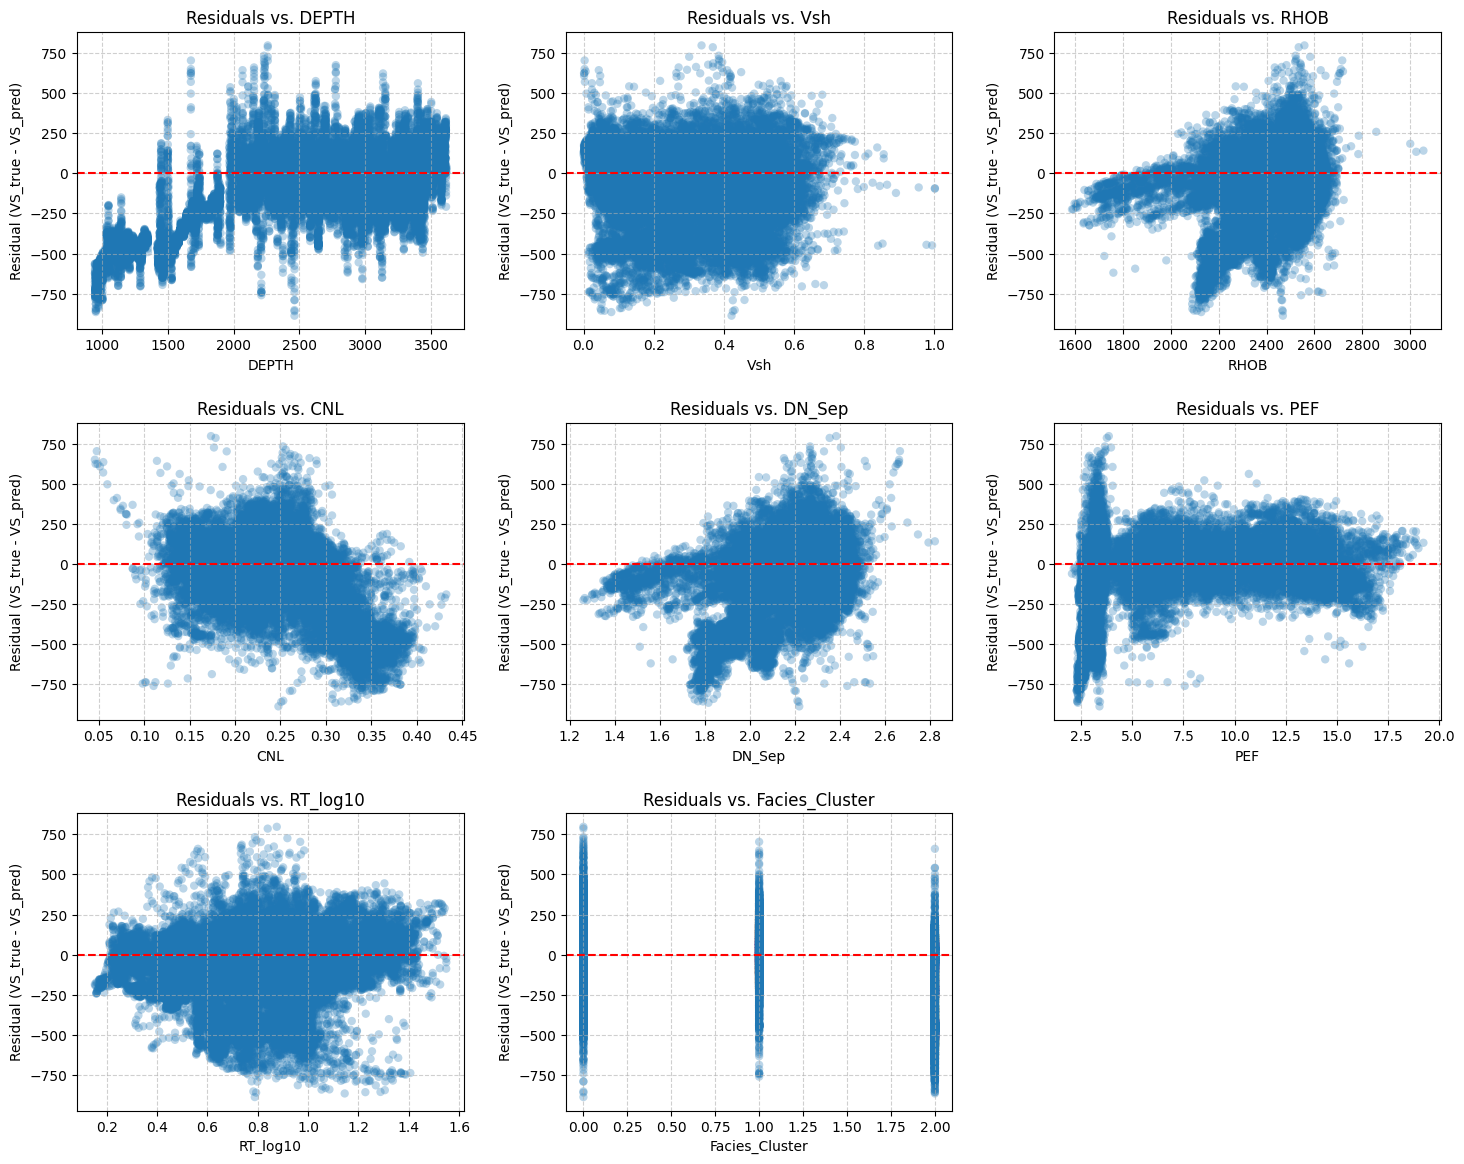

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# --- Plotting the Residuals ---

# Get the list of features we want to plot against
features_to_plot = selected_features # This was defined in your previous code
num_features = len(features_to_plot)

# Determine the grid size for the subplots (e.g., 3 columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

print("\nGenerating residual plots for VS predictions...")

for i, feature in enumerate(features_to_plot):
    ax = axes[i]

    # Create a scatter plot of the feature vs. the residuals
    sns.scatterplot(
        x=all_results_df[feature],
        y=all_results_df['Residuals'],
        ax=ax,
        alpha=0.3, # Use transparency to see data density
        edgecolor='none'
    )

    # Add a horizontal line at y=0 (zero error) for reference
    ax.axhline(0, color='red', linestyle='--', linewidth=1.5)

    ax.set_title(f'Residuals vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Residual (VS_true - VS_pred)')
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide any unused subplots if the number of features isn't a perfect multiple of num_cols
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

Training the final model on the entire dataset for SHAP analysis...
Model training complete.
Calculating SHAP values...
SHAP values calculated.

Generating SHAP summary plot...


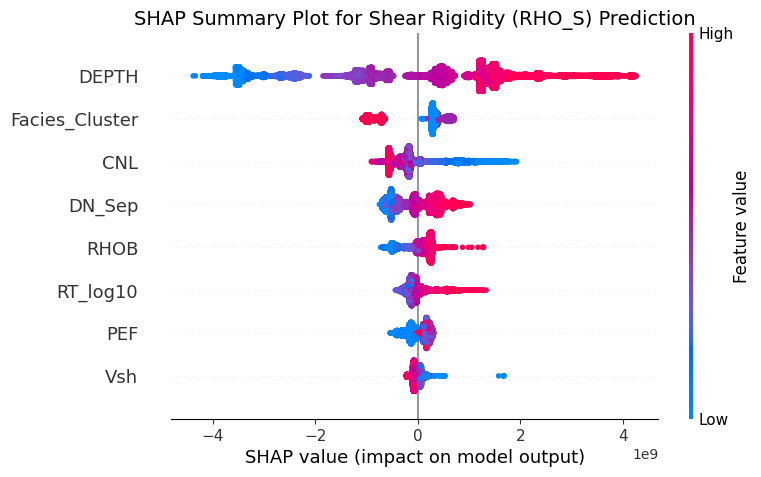

In [ ]:
import shap
import pandas as pd

# --- 1. Train the Final Model on ALL Data ---
# To create a global SHAP summary, we need one model trained on the entire dataset.
# We use the best hyperparameters found by GridSearchCV.
print("Training the final model on the entire dataset for SHAP analysis...")
best_xgb_model.fit(features, target)
print("Model training complete.")


# --- 2. Create the SHAP Explainer and Calculate Values ---
# Since XGBoost is a tree-based model, we use the efficient TreeExplainer.
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for all of your features. This can take a moment.
print("Calculating SHAP values...")
shap_values = explainer.shap_values(features)
print("SHAP values calculated.")


# --- 3. Generate and Display the SHAP Summary Plot ---
print("\nGenerating SHAP summary plot...")
shap.summary_plot(shap_values, features, plot_type="dot", show=False)

# Add a title for clarity
plt.title('SHAP Summary Plot for Shear Rigidity (RHO_S) Prediction', size=14)
plt.show()

Generating SHAP bar plot...


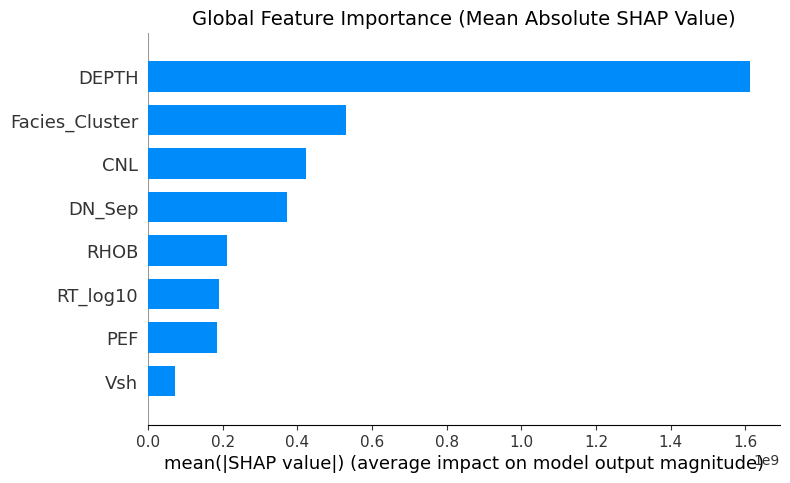

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Generate and Display the SHAP Bar Plot ---
# This plot shows the mean absolute SHAP value for each feature,
# which represents its overall importance to the model.

print("Generating SHAP bar plot...")
shap.summary_plot(shap_values, features, plot_type="bar", show=False)

# Add a title for clarity
plt.title('Global Feature Importance (Mean Absolute SHAP Value)', size=14)
plt.show()

Generating SHAP dependence plot for DEPTH...


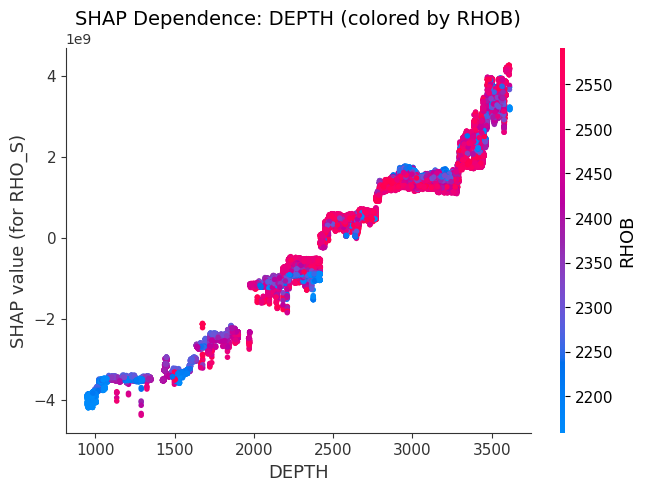

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Create the SHAP Dependence Plot for DEPTH ---
print("Generating SHAP dependence plot for DEPTH...")

# The 'interaction_index="auto"' automatically finds the feature
# that has the strongest interaction with DEPTH. Let's specify RHOB for this case.
shap.dependence_plot(
    "DEPTH",
    shap_values,
    features,
    interaction_index="RHOB",
    show=False
)

plt.title('SHAP Dependence: DEPTH (colored by RHOB)', size=14)
plt.ylabel('SHAP value (for RHO_S)')
plt.show()


Generating SHAP dependence plot for Facies...


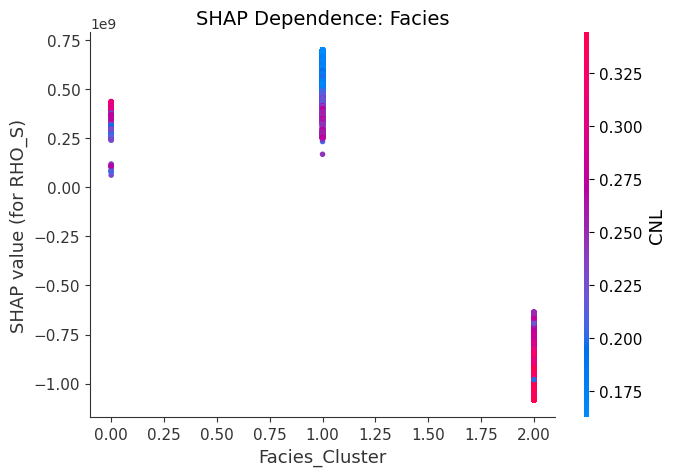

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Create the SHAP Dependence Plot for Facies ---
print("\nGenerating SHAP dependence plot for Facies...")

# We'll let SHAP automatically find the best feature to show interaction
shap.dependence_plot(
    "Facies_Cluster",
    shap_values,
    features,
    interaction_index="auto",
    show=False
)

plt.title('SHAP Dependence: Facies', size=14)
plt.ylabel('SHAP value (for RHO_S)')
plt.show()


Generating SHAP dependence plot for CNL...


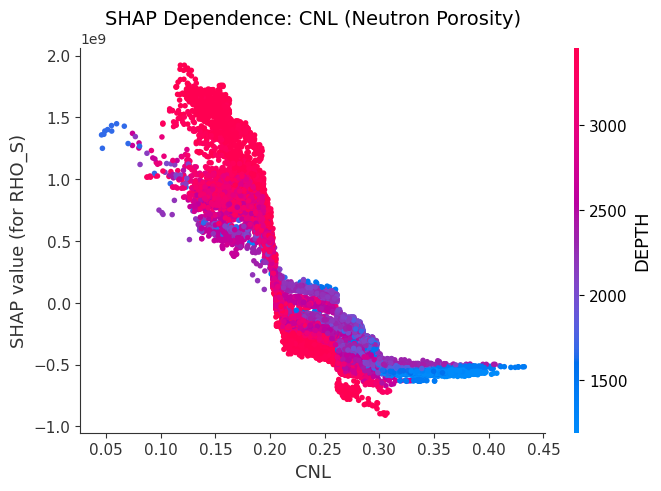

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Create the SHAP Dependence Plot for CNL ---
print("\nGenerating SHAP dependence plot for CNL...")

# We'll let SHAP automatically find the best feature to show interaction
shap.dependence_plot(
    "CNL",
    shap_values,
    features,
    interaction_index="auto",
    show=False
)

plt.title('SHAP Dependence: CNL (Neutron Porosity)', size=14)
plt.ylabel('SHAP value (for RHO_S)')
plt.show()


Generating SHAP dependence plot for Vsh...


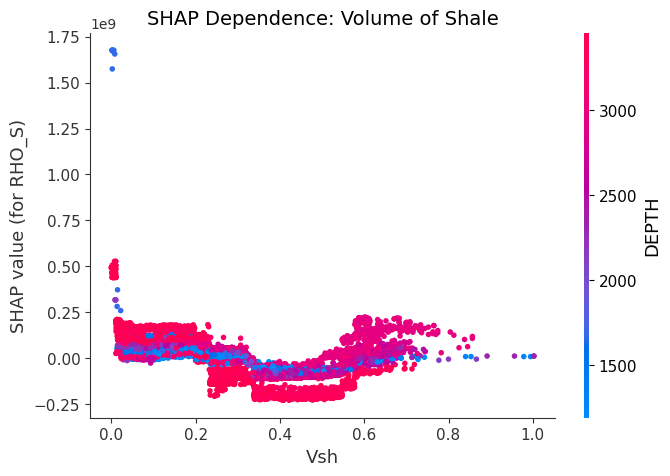

In [ ]:
import shap
import matplotlib.pyplot as plt

# --- Create the SHAP Dependence Plot for Vsh ---
print("\nGenerating SHAP dependence plot for Vsh...")

# We'll let SHAP automatically find the best feature to show interaction
shap.dependence_plot(
    "Vsh",
    shap_values,
    features,
    interaction_index="auto",
    show=False
)

plt.title('SHAP Dependence: Volume of Shale', size=14)
plt.ylabel('SHAP value (for RHO_S)')
plt.show()